### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMClassifier

In [2]:
# Load dataset 
df = joblib.load('df_crystal_structure.pkl')

# Define features and target variable
features = joblib.load('features_crystal_structure.pkl')

print('No. of features', len(features))

df.head()

No. of features 1826


,formation_energy_per_atom,band_gap,diel.poly_electronic,diel.refractive_index,piezo.eij_max,energy_per_atom,elasticity.K_Voigt_Reuss_Hill,elasticity.G_Voigt_Reuss_Hill,elasticity.poisson_ratio,nsites,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,crystal_structure
task_id,,,,,,,,,,,,,,,,,,,,,
mvc-7733,-2.014294,0.8402,0.0,0.0,0.0,-6.667034,0.0,0.0,0.00,88.0,...,8.900000,9.023256,9.142857,9.400000,9.600000,9.846154,10.000000,9.750000,9.608696,2
mp-981365,-0.298756,0.0000,0.0,0.0,0.0,-10.269663,250.0,124.0,0.29,4.0,...,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,24.000000,7
mp-1216333,-1.621763,2.6615,0.0,0.0,0.0,-5.996506,0.0,0.0,0.00,26.0,...,9.538462,9.692308,13.076923,11.076923,12.615385,8.461538,6.923077,8.307692,8.923077,2
mp-674329,-1.162344,0.5282,0.0,0.0,0.0,-4.498261,0.0,0.0,0.00,14.0,...,0.000000,2.857143,3.428571,12.571429,4.571429,2.285714,3.428571,3.428571,2.857143,4
mp-555534,-2.218500,3.0885,0.0,0.0,0.0,-6.587916,0.0,0.0,0.00,48.0,...,4.750000,6.125000,8.125000,4.875000,4.375000,9.500000,7.250000,7.000000,7.500000,5


In [3]:
target = 'crystal_structure'
print(target)

crystal_structure


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\8 other_properties\crystal_structure


In [5]:
# Split dataset
df_train, df_test = train_test_split(
                                    df, 
                                    test_size=0.2, 
                                    stratify=df[target].tolist(), 
                                    random_state=42
                                    ) 

In [6]:
# Save unscaled data
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '.pkl')
joblib.dump(df_test, target + '_results/' + 'df_test_' + str(target) + '.pkl')

['crystal_structure_results/df_test_crystal_structure.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

# Create pandas.Dataframe of scaled test set using scaler as defined using training set                           
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '_scaled.pkl')
joblib.dump(df_test, target + '_results/' +  'df_test_' + str(target) + '_scaled.pkl')

['crystal_structure_results/df_test_crystal_structure_scaled.pkl']

#### GBFS

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd

In [2]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\8 other_properties\crystal_structure


In [3]:
# Target
target = 'crystal_structure'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/crystal_structure/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_crystal_structure.pkl'

problem = 'classification'

In [4]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = True, 
            problem = problem,
            target_classes=7
            )

Name of target column:  crystal_structure
No. of exploratory features:  1826


In [6]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        objective='multiclass', 
        oversample_technique='smoothed_ros',
        cv_folds = 10
        )

Model employed:  lightGBM
Total no. of permutations: 8


   (1 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 20)]
   No. of rows in the training set: 31352

   Oversampling training data...
   No. of rows in training set after oversampling: 47565
   Metric score:  0.56598
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 31352

   Oversampling training data...
   No. of rows in training set after oversampling: 47565
   Metric score:  0.59980
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 20)]
   No. of rows in the training set: 31352

   Oversampling training data...
   No. of rows in training set after oversampling: 47565
   Metric score:  0.57874

LGBMClassifier(importance_type='gain', learning_rate=0.2, n_estimators=200,
               num_leaves=30, objective='multiclass')

Result saved as: feature_relevance_score_crystal_structure.pkl
Figure saved as: feature_relevance_plot_crystal_structure.png


,feature,relevance_score
0,nsites,34971.343419
1,830,24549.714128
2,155,23884.096268
3,1397,15055.352832
4,noble_gas,14679.713981
...,...,...
1821,682,0.000000
1822,684,0.000000
1823,685,0.000000
1824,686,0.000000


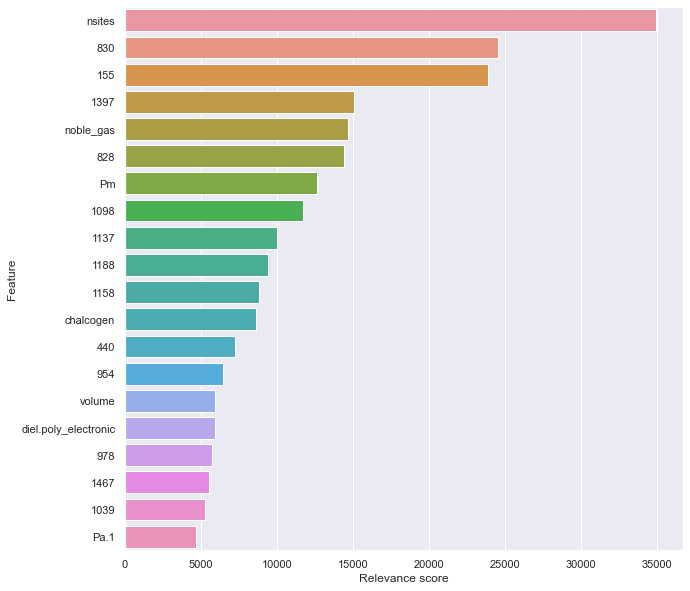

In [7]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [8]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = True, 
                    oversample_technique = 'smoothed_ros', 
                    chosen_metric = 'f1_score',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  31352


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  1

n=1: train_acc=0.4550, validation_acc=0.3035 

n=1: train_b_acc=0.3994, validation_b_acc=0.2537 

n=1: train_hl=0.5450 validation_hl=0.6965 

n=1: train_f1=0.4320, validation_f1=0.2655 

n=1: train_roc_auc=0.7881, validation_roc_auc=0.6363 

n=1: train_avg_precision)=0.1710, validation_avg_precision)=0.1603 

--- 2.5443127155303955 seconds --- 



c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  2

n=2: train_acc=0.4650, validation_acc=0.3005 

n=2: train_b_acc=0.4161, validation_b_acc=0.2516 

n=2: train_hl=0.5350 validation_hl=0.6995 

n=2: train_f1=0.4459, validation_f1=0.2642 

n=2: train_roc_auc=0.7950, validation_roc_auc=0.6408 

n=2: train_avg_precision)=0.1675, validation_avg_precision)=0.1612 

--- 3.075796127319336 seconds --- 



c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  3

n=3: train_acc=0.4650, validation_acc=0.3005 

n=3: train_b_acc=0.4161, validation_b_acc=0.2516 

n=3: train_hl=0.5350 validation_hl=0.6995 

n=3: train_f1=0.4459, validation_f1=0.2642 

n=3: train_roc_auc=0.7950, validation_roc_auc=0.6408 

n=3: train_avg_precision)=0.1675, validation_avg_precision)=0.1612 

--- 3.035759449005127 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  4

n=4: train_acc=0.5614, validation_acc=0.2804 

n=4: train_b_acc=0.5224, validation_b_acc=0.2497 

n=4: train_hl=0.4386 validation_hl=0.7196 

n=4: train_f1=0.5554, validation_f1=0.2671 

n=4: train_roc_auc=0.8722, validation_roc_auc=0.6729 

n=4: train_avg_precision)=0.1700, validation_avg_precision)=0.1718 

--- 2.810554027557373 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  5

n=5: train_acc=0.5614, validation_acc=0.2804 

n=5: train_b_acc=0.5224, validation_b_acc=0.2497 

n=5: train_hl=0.4386 validation_hl=0.7196 

n=5: train_f1=0.5554, validation_f1=0.2671 

n=5: train_roc_auc=0.8722, validation_roc_auc=0.6729 

n=5: train_avg_precision)=0.1700, validation_avg_precision)=0.1718 

--- 2.462238311767578 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  6

n=6: train_acc=0.5614, validation_acc=0.2804 

n=6: train_b_acc=0.5224, validation_b_acc=0.2497 

n=6: train_hl=0.4386 validation_hl=0.7196 

n=6: train_f1=0.5554, validation_f1=0.2671 

n=6: train_roc_auc=0.8722, validation_roc_auc=0.6729 

n=6: train_avg_precision)=0.1700, validation_avg_precision)=0.1718 

--- 2.284076452255249 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  7

n=7: train_acc=0.5618, validation_acc=0.2785 

n=7: train_b_acc=0.5222, validation_b_acc=0.2474 

n=7: train_hl=0.4382 validation_hl=0.7215 

n=7: train_f1=0.5555, validation_f1=0.2657 

n=7: train_roc_auc=0.8725, validation_roc_auc=0.6724 

n=7: train_avg_precision)=0.1696, validation_avg_precision)=0.1714 

--- 2.3211092948913574 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  8

n=8: train_acc=0.7458, validation_acc=0.3780 

n=8: train_b_acc=0.7216, validation_b_acc=0.3402 

n=8: train_hl=0.2542 validation_hl=0.6220 

n=8: train_f1=0.7454, validation_f1=0.3803 

n=8: train_roc_auc=0.9543, validation_roc_auc=0.7621 

n=8: train_avg_precision)=0.1565, validation_avg_precision)=0.1822 

--- 2.1829843521118164 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  9

n=9: train_acc=0.7754, validation_acc=0.4009 

n=9: train_b_acc=0.7530, validation_b_acc=0.3631 

n=9: train_hl=0.2246 validation_hl=0.5991 

n=9: train_f1=0.7749, validation_f1=0.3995 

n=9: train_roc_auc=0.9622, validation_roc_auc=0.7838 

n=9: train_avg_precision)=0.1554, validation_avg_precision)=0.1834 

--- 2.5843493938446045 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  10

n=10: train_acc=0.8340, validation_acc=0.4279 

n=10: train_b_acc=0.8198, validation_b_acc=0.4010 

n=10: train_hl=0.1660 validation_hl=0.5721 

n=10: train_f1=0.8342, validation_f1=0.4315 

n=10: train_roc_auc=0.9758, validation_roc_auc=0.7981 

n=10: train_avg_precision)=0.1583, validation_avg_precision)=0.1747 

--- 2.545313835144043 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  11

n=11: train_acc=0.8496, validation_acc=0.4030 

n=11: train_b_acc=0.8393, validation_b_acc=0.3840 

n=11: train_hl=0.1504 validation_hl=0.5970 

n=11: train_f1=0.8498, validation_f1=0.4121 

n=11: train_roc_auc=0.9796, validation_roc_auc=0.8007 

n=11: train_avg_precision)=0.1588, validation_avg_precision)=0.1730 

--- 2.686441659927368 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  12

n=12: train_acc=0.8630, validation_acc=0.4233 

n=12: train_b_acc=0.8554, validation_b_acc=0.3990 

n=12: train_hl=0.1370 validation_hl=0.5767 

n=12: train_f1=0.8632, validation_f1=0.4304 

n=12: train_roc_auc=0.9826, validation_roc_auc=0.8081 

n=12: train_avg_precision)=0.1591, validation_avg_precision)=0.1746 

--- 2.6193807125091553 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  13

n=13: train_acc=0.9104, validation_acc=0.4930 

n=13: train_b_acc=0.9083, validation_b_acc=0.4662 

n=13: train_hl=0.0896 validation_hl=0.5070 

n=13: train_f1=0.9105, validation_f1=0.5049 

n=13: train_roc_auc=0.9917, validation_roc_auc=0.8346 

n=13: train_avg_precision)=0.1575, validation_avg_precision)=0.1619 

--- 3.1058237552642822 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  14

n=14: train_acc=0.9296, validation_acc=0.5215 

n=14: train_b_acc=0.9283, validation_b_acc=0.4898 

n=14: train_hl=0.0704 validation_hl=0.4785 

n=14: train_f1=0.9296, validation_f1=0.5314 

n=14: train_roc_auc=0.9945, validation_roc_auc=0.8570 

n=14: train_avg_precision)=0.1583, validation_avg_precision)=0.1659 

--- 2.963693618774414 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  15

n=15: train_acc=0.9442, validation_acc=0.5455 

n=15: train_b_acc=0.9434, validation_b_acc=0.5189 

n=15: train_hl=0.0558 validation_hl=0.4545 

n=15: train_f1=0.9442, validation_f1=0.5557 

n=15: train_roc_auc=0.9961, validation_roc_auc=0.8705 

n=15: train_avg_precision)=0.1590, validation_avg_precision)=0.1609 

--- 2.8275704383850098 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  16

n=16: train_acc=0.9455, validation_acc=0.5665 

n=16: train_b_acc=0.9452, validation_b_acc=0.5370 

n=16: train_hl=0.0545 validation_hl=0.4335 

n=16: train_f1=0.9455, validation_f1=0.5757 

n=16: train_roc_auc=0.9962, validation_roc_auc=0.8736 

n=16: train_avg_precision)=0.1592, validation_avg_precision)=0.1636 

--- 2.944676637649536 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  17

n=17: train_acc=0.9549, validation_acc=0.5928 

n=17: train_b_acc=0.9548, validation_b_acc=0.5535 

n=17: train_hl=0.0451 validation_hl=0.4072 

n=17: train_f1=0.9549, validation_f1=0.5971 

n=17: train_roc_auc=0.9972, validation_roc_auc=0.8843 

n=17: train_avg_precision)=0.1610, validation_avg_precision)=0.1780 

--- 3.0717923641204834 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  18

n=18: train_acc=0.9544, validation_acc=0.5900 

n=18: train_b_acc=0.9543, validation_b_acc=0.5518 

n=18: train_hl=0.0456 validation_hl=0.4100 

n=18: train_f1=0.9543, validation_f1=0.5959 

n=18: train_roc_auc=0.9973, validation_roc_auc=0.8844 

n=18: train_avg_precision)=0.1610, validation_avg_precision)=0.1762 

--- 3.0908093452453613 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  19

n=19: train_acc=0.9617, validation_acc=0.6196 

n=19: train_b_acc=0.9618, validation_b_acc=0.5870 

n=19: train_hl=0.0383 validation_hl=0.3804 

n=19: train_f1=0.9617, validation_f1=0.6256 

n=19: train_roc_auc=0.9979, validation_roc_auc=0.8947 

n=19: train_avg_precision)=0.1623, validation_avg_precision)=0.1810 

--- 3.291992664337158 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  20

n=20: train_acc=0.9608, validation_acc=0.6156 

n=20: train_b_acc=0.9612, validation_b_acc=0.5836 

n=20: train_hl=0.0392 validation_hl=0.3844 

n=20: train_f1=0.9608, validation_f1=0.6225 

n=20: train_roc_auc=0.9979, validation_roc_auc=0.8933 

n=20: train_avg_precision)=0.1641, validation_avg_precision)=0.1870 

--- 3.0477705001831055 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  21

n=21: train_acc=0.9654, validation_acc=0.6262 

n=21: train_b_acc=0.9660, validation_b_acc=0.5962 

n=21: train_hl=0.0346 validation_hl=0.3738 

n=21: train_f1=0.9654, validation_f1=0.6329 

n=21: train_roc_auc=0.9983, validation_roc_auc=0.8981 

n=21: train_avg_precision)=0.1633, validation_avg_precision)=0.1816 

--- 3.3580527305603027 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  22

n=22: train_acc=0.9658, validation_acc=0.6218 

n=22: train_b_acc=0.9667, validation_b_acc=0.5922 

n=22: train_hl=0.0342 validation_hl=0.3782 

n=22: train_f1=0.9658, validation_f1=0.6290 

n=22: train_roc_auc=0.9983, validation_roc_auc=0.8967 

n=22: train_avg_precision)=0.1632, validation_avg_precision)=0.1807 

--- 3.3760697841644287 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  23

n=23: train_acc=0.9680, validation_acc=0.6292 

n=23: train_b_acc=0.9685, validation_b_acc=0.5980 

n=23: train_hl=0.0320 validation_hl=0.3708 

n=23: train_f1=0.9680, validation_f1=0.6350 

n=23: train_roc_auc=0.9985, validation_roc_auc=0.9017 

n=23: train_avg_precision)=0.1635, validation_avg_precision)=0.1796 

--- 3.5892627239227295 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  24

n=24: train_acc=0.9680, validation_acc=0.6292 

n=24: train_b_acc=0.9685, validation_b_acc=0.5980 

n=24: train_hl=0.0320 validation_hl=0.3708 

n=24: train_f1=0.9680, validation_f1=0.6350 

n=24: train_roc_auc=0.9985, validation_roc_auc=0.9017 

n=24: train_avg_precision)=0.1635, validation_avg_precision)=0.1796 

--- 3.7514100074768066 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  25

n=25: train_acc=0.9671, validation_acc=0.6303 

n=25: train_b_acc=0.9676, validation_b_acc=0.6021 

n=25: train_hl=0.0329 validation_hl=0.3697 

n=25: train_f1=0.9671, validation_f1=0.6370 

n=25: train_roc_auc=0.9984, validation_roc_auc=0.9030 

n=25: train_avg_precision)=0.1629, validation_avg_precision)=0.1760 

--- 3.918562173843384 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  26

n=26: train_acc=0.9709, validation_acc=0.6480 

n=26: train_b_acc=0.9715, validation_b_acc=0.6203 

n=26: train_hl=0.0291 validation_hl=0.3520 

n=26: train_f1=0.9709, validation_f1=0.6547 

n=26: train_roc_auc=0.9987, validation_roc_auc=0.9095 

n=26: train_avg_precision)=0.1637, validation_avg_precision)=0.1763 

--- 3.8935389518737793 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  27

n=27: train_acc=0.9709, validation_acc=0.6480 

n=27: train_b_acc=0.9715, validation_b_acc=0.6203 

n=27: train_hl=0.0291 validation_hl=0.3520 

n=27: train_f1=0.9709, validation_f1=0.6547 

n=27: train_roc_auc=0.9987, validation_roc_auc=0.9095 

n=27: train_avg_precision)=0.1637, validation_avg_precision)=0.1763 

--- 3.3790712356567383 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  28

n=28: train_acc=0.9720, validation_acc=0.6534 

n=28: train_b_acc=0.9723, validation_b_acc=0.6232 

n=28: train_hl=0.0280 validation_hl=0.3466 

n=28: train_f1=0.9720, validation_f1=0.6598 

n=28: train_roc_auc=0.9988, validation_roc_auc=0.9124 

n=28: train_avg_precision)=0.1634, validation_avg_precision)=0.1730 

--- 3.5272061824798584 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  29

n=29: train_acc=0.9772, validation_acc=0.6692 

n=29: train_b_acc=0.9771, validation_b_acc=0.6338 

n=29: train_hl=0.0228 validation_hl=0.3308 

n=29: train_f1=0.9771, validation_f1=0.6740 

n=29: train_roc_auc=0.9991, validation_roc_auc=0.9200 

n=29: train_avg_precision)=0.1642, validation_avg_precision)=0.1708 

--- 3.4441311359405518 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  30

n=30: train_acc=0.9790, validation_acc=0.6753 

n=30: train_b_acc=0.9791, validation_b_acc=0.6437 

n=30: train_hl=0.0210 validation_hl=0.3247 

n=30: train_f1=0.9790, validation_f1=0.6800 

n=30: train_roc_auc=0.9992, validation_roc_auc=0.9209 

n=30: train_avg_precision)=0.1649, validation_avg_precision)=0.1728 

--- 3.3140127658843994 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  31

n=31: train_acc=0.9791, validation_acc=0.6759 

n=31: train_b_acc=0.9799, validation_b_acc=0.6422 

n=31: train_hl=0.0209 validation_hl=0.3241 

n=31: train_f1=0.9791, validation_f1=0.6803 

n=31: train_roc_auc=0.9992, validation_roc_auc=0.9227 

n=31: train_avg_precision)=0.1660, validation_avg_precision)=0.1739 

--- 3.38407564163208 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  32

n=32: train_acc=0.9862, validation_acc=0.6789 

n=32: train_b_acc=0.9868, validation_b_acc=0.6446 

n=32: train_hl=0.0138 validation_hl=0.3211 

n=32: train_f1=0.9862, validation_f1=0.6834 

n=32: train_roc_auc=0.9996, validation_roc_auc=0.9249 

n=32: train_avg_precision)=0.1652, validation_avg_precision)=0.1741 

--- 3.381073474884033 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  33

n=33: train_acc=0.9906, validation_acc=0.6970 

n=33: train_b_acc=0.9914, validation_b_acc=0.6618 

n=33: train_hl=0.0094 validation_hl=0.3030 

n=33: train_f1=0.9906, validation_f1=0.7002 

n=33: train_roc_auc=0.9998, validation_roc_auc=0.9337 

n=33: train_avg_precision)=0.1659, validation_avg_precision)=0.1701 

--- 3.709371566772461 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  34

n=34: train_acc=0.9906, validation_acc=0.6970 

n=34: train_b_acc=0.9914, validation_b_acc=0.6618 

n=34: train_hl=0.0094 validation_hl=0.3030 

n=34: train_f1=0.9906, validation_f1=0.7002 

n=34: train_roc_auc=0.9998, validation_roc_auc=0.9337 

n=34: train_avg_precision)=0.1659, validation_avg_precision)=0.1701 

--- 3.6623294353485107 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  35

n=35: train_acc=0.9906, validation_acc=0.6970 

n=35: train_b_acc=0.9914, validation_b_acc=0.6618 

n=35: train_hl=0.0094 validation_hl=0.3030 

n=35: train_f1=0.9906, validation_f1=0.7002 

n=35: train_roc_auc=0.9998, validation_roc_auc=0.9337 

n=35: train_avg_precision)=0.1659, validation_avg_precision)=0.1701 

--- 3.722383499145508 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  36

n=36: train_acc=0.9917, validation_acc=0.7025 

n=36: train_b_acc=0.9923, validation_b_acc=0.6684 

n=36: train_hl=0.0083 validation_hl=0.2975 

n=36: train_f1=0.9917, validation_f1=0.7060 

n=36: train_roc_auc=0.9998, validation_roc_auc=0.9360 

n=36: train_avg_precision)=0.1652, validation_avg_precision)=0.1684 

--- 3.5181984901428223 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  37

n=37: train_acc=0.9922, validation_acc=0.7046 

n=37: train_b_acc=0.9929, validation_b_acc=0.6705 

n=37: train_hl=0.0078 validation_hl=0.2954 

n=37: train_f1=0.9922, validation_f1=0.7075 

n=37: train_roc_auc=0.9998, validation_roc_auc=0.9362 

n=37: train_avg_precision)=0.1658, validation_avg_precision)=0.1698 

--- 3.609281063079834 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  38

n=38: train_acc=0.9914, validation_acc=0.6995 

n=38: train_b_acc=0.9919, validation_b_acc=0.6651 

n=38: train_hl=0.0086 validation_hl=0.3005 

n=38: train_f1=0.9914, validation_f1=0.7027 

n=38: train_roc_auc=0.9998, validation_roc_auc=0.9361 

n=38: train_avg_precision)=0.1656, validation_avg_precision)=0.1722 

--- 3.6262965202331543 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  39

n=39: train_acc=0.9922, validation_acc=0.7150 

n=39: train_b_acc=0.9925, validation_b_acc=0.6802 

n=39: train_hl=0.0078 validation_hl=0.2850 

n=39: train_f1=0.9922, validation_f1=0.7186 

n=39: train_roc_auc=0.9999, validation_roc_auc=0.9406 

n=39: train_avg_precision)=0.1655, validation_avg_precision)=0.1702 

--- 3.8635120391845703 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  40

n=40: train_acc=0.9922, validation_acc=0.7118 

n=40: train_b_acc=0.9927, validation_b_acc=0.6762 

n=40: train_hl=0.0078 validation_hl=0.2882 

n=40: train_f1=0.9922, validation_f1=0.7149 

n=40: train_roc_auc=0.9999, validation_roc_auc=0.9419 

n=40: train_avg_precision)=0.1664, validation_avg_precision)=0.1697 

--- 4.112738370895386 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  41

n=41: train_acc=0.9928, validation_acc=0.7150 

n=41: train_b_acc=0.9933, validation_b_acc=0.6800 

n=41: train_hl=0.0072 validation_hl=0.2850 

n=41: train_f1=0.9928, validation_f1=0.7185 

n=41: train_roc_auc=0.9999, validation_roc_auc=0.9428 

n=41: train_avg_precision)=0.1666, validation_avg_precision)=0.1704 

--- 3.8585073947906494 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  42

n=42: train_acc=0.9918, validation_acc=0.7192 

n=42: train_b_acc=0.9923, validation_b_acc=0.6835 

n=42: train_hl=0.0082 validation_hl=0.2808 

n=42: train_f1=0.9918, validation_f1=0.7219 

n=42: train_roc_auc=0.9999, validation_roc_auc=0.9433 

n=42: train_avg_precision)=0.1673, validation_avg_precision)=0.1690 

--- 3.763420820236206 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  43

n=43: train_acc=0.9926, validation_acc=0.7179 

n=43: train_b_acc=0.9931, validation_b_acc=0.6876 

n=43: train_hl=0.0074 validation_hl=0.2821 

n=43: train_f1=0.9926, validation_f1=0.7211 

n=43: train_roc_auc=0.9999, validation_roc_auc=0.9431 

n=43: train_avg_precision)=0.1676, validation_avg_precision)=0.1707 

--- 4.2228381633758545 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  44

n=44: train_acc=0.9956, validation_acc=0.7229 

n=44: train_b_acc=0.9960, validation_b_acc=0.6921 

n=44: train_hl=0.0044 validation_hl=0.2771 

n=44: train_f1=0.9956, validation_f1=0.7255 

n=44: train_roc_auc=0.9999, validation_roc_auc=0.9431 

n=44: train_avg_precision)=0.1680, validation_avg_precision)=0.1719 

--- 3.85250186920166 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  45

n=45: train_acc=0.9960, validation_acc=0.7312 

n=45: train_b_acc=0.9966, validation_b_acc=0.6975 

n=45: train_hl=0.0040 validation_hl=0.2688 

n=45: train_f1=0.9960, validation_f1=0.7335 

n=45: train_roc_auc=0.9999, validation_roc_auc=0.9462 

n=45: train_avg_precision)=0.1691, validation_avg_precision)=0.1724 

--- 3.93257474899292 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  46

n=46: train_acc=0.9961, validation_acc=0.7216 

n=46: train_b_acc=0.9966, validation_b_acc=0.6881 

n=46: train_hl=0.0039 validation_hl=0.2784 

n=46: train_f1=0.9961, validation_f1=0.7242 

n=46: train_roc_auc=0.9999, validation_roc_auc=0.9459 

n=46: train_avg_precision)=0.1686, validation_avg_precision)=0.1726 

--- 3.9686076641082764 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  47

n=47: train_acc=0.9963, validation_acc=0.7256 

n=47: train_b_acc=0.9969, validation_b_acc=0.6927 

n=47: train_hl=0.0037 validation_hl=0.2744 

n=47: train_f1=0.9963, validation_f1=0.7280 

n=47: train_roc_auc=1.0000, validation_roc_auc=0.9457 

n=47: train_avg_precision)=0.1702, validation_avg_precision)=0.1738 

--- 3.9095535278320312 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  48

n=48: train_acc=0.9961, validation_acc=0.7288 

n=48: train_b_acc=0.9965, validation_b_acc=0.6986 

n=48: train_hl=0.0039 validation_hl=0.2712 

n=48: train_f1=0.9961, validation_f1=0.7312 

n=48: train_roc_auc=1.0000, validation_roc_auc=0.9471 

n=48: train_avg_precision)=0.1692, validation_avg_precision)=0.1724 

--- 4.007642984390259 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  49

n=49: train_acc=0.9961, validation_acc=0.7380 

n=49: train_b_acc=0.9967, validation_b_acc=0.7061 

n=49: train_hl=0.0039 validation_hl=0.2620 

n=49: train_f1=0.9961, validation_f1=0.7400 

n=49: train_roc_auc=1.0000, validation_roc_auc=0.9493 

n=49: train_avg_precision)=0.1694, validation_avg_precision)=0.1713 

--- 3.960599899291992 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  50

n=50: train_acc=0.9962, validation_acc=0.7363 

n=50: train_b_acc=0.9966, validation_b_acc=0.7060 

n=50: train_hl=0.0038 validation_hl=0.2637 

n=50: train_f1=0.9962, validation_f1=0.7379 

n=50: train_roc_auc=1.0000, validation_roc_auc=0.9495 

n=50: train_avg_precision)=0.1693, validation_avg_precision)=0.1718 

--- 4.165786504745483 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  51

n=51: train_acc=0.9966, validation_acc=0.7306 

n=51: train_b_acc=0.9970, validation_b_acc=0.7041 

n=51: train_hl=0.0034 validation_hl=0.2694 

n=51: train_f1=0.9966, validation_f1=0.7318 

n=51: train_roc_auc=1.0000, validation_roc_auc=0.9454 

n=51: train_avg_precision)=0.1711, validation_avg_precision)=0.1752 

--- 4.008644104003906 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  52

n=52: train_acc=0.9968, validation_acc=0.7292 

n=52: train_b_acc=0.9973, validation_b_acc=0.7030 

n=52: train_hl=0.0032 validation_hl=0.2708 

n=52: train_f1=0.9968, validation_f1=0.7303 

n=52: train_roc_auc=1.0000, validation_roc_auc=0.9467 

n=52: train_avg_precision)=0.1705, validation_avg_precision)=0.1766 

--- 4.049681186676025 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  53

n=53: train_acc=0.9971, validation_acc=0.7353 

n=53: train_b_acc=0.9976, validation_b_acc=0.7097 

n=53: train_hl=0.0029 validation_hl=0.2647 

n=53: train_f1=0.9971, validation_f1=0.7366 

n=53: train_roc_auc=1.0000, validation_roc_auc=0.9475 

n=53: train_avg_precision)=0.1714, validation_avg_precision)=0.1785 

--- 4.170790910720825 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  54

n=54: train_acc=0.9970, validation_acc=0.7367 

n=54: train_b_acc=0.9972, validation_b_acc=0.7129 

n=54: train_hl=0.0030 validation_hl=0.2633 

n=54: train_f1=0.9970, validation_f1=0.7379 

n=54: train_roc_auc=1.0000, validation_roc_auc=0.9481 

n=54: train_avg_precision)=0.1703, validation_avg_precision)=0.1758 

--- 4.2228381633758545 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  55

n=55: train_acc=0.9971, validation_acc=0.7444 

n=55: train_b_acc=0.9975, validation_b_acc=0.7185 

n=55: train_hl=0.0029 validation_hl=0.2556 

n=55: train_f1=0.9971, validation_f1=0.7464 

n=55: train_roc_auc=1.0000, validation_roc_auc=0.9489 

n=55: train_avg_precision)=0.1702, validation_avg_precision)=0.1723 

--- 4.131755352020264 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  56

n=56: train_acc=0.9974, validation_acc=0.7452 

n=56: train_b_acc=0.9978, validation_b_acc=0.7204 

n=56: train_hl=0.0026 validation_hl=0.2548 

n=56: train_f1=0.9974, validation_f1=0.7468 

n=56: train_roc_auc=1.0000, validation_roc_auc=0.9497 

n=56: train_avg_precision)=0.1708, validation_avg_precision)=0.1738 

--- 4.471064329147339 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  57

n=57: train_acc=0.9971, validation_acc=0.7368 

n=57: train_b_acc=0.9975, validation_b_acc=0.7105 

n=57: train_hl=0.0029 validation_hl=0.2632 

n=57: train_f1=0.9971, validation_f1=0.7378 

n=57: train_roc_auc=1.0000, validation_roc_auc=0.9483 

n=57: train_avg_precision)=0.1707, validation_avg_precision)=0.1740 

--- 4.415012836456299 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  58

n=58: train_acc=0.9971, validation_acc=0.7424 

n=58: train_b_acc=0.9976, validation_b_acc=0.7196 

n=58: train_hl=0.0029 validation_hl=0.2576 

n=58: train_f1=0.9971, validation_f1=0.7440 

n=58: train_roc_auc=1.0000, validation_roc_auc=0.9490 

n=58: train_avg_precision)=0.1715, validation_avg_precision)=0.1757 

--- 5.1006364822387695 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  59

n=59: train_acc=0.9974, validation_acc=0.7483 

n=59: train_b_acc=0.9978, validation_b_acc=0.7253 

n=59: train_hl=0.0026 validation_hl=0.2517 

n=59: train_f1=0.9974, validation_f1=0.7488 

n=59: train_roc_auc=1.0000, validation_roc_auc=0.9514 

n=59: train_avg_precision)=0.1706, validation_avg_precision)=0.1735 

--- 4.9575066566467285 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  60

n=60: train_acc=0.9976, validation_acc=0.7433 

n=60: train_b_acc=0.9979, validation_b_acc=0.7160 

n=60: train_hl=0.0024 validation_hl=0.2567 

n=60: train_f1=0.9976, validation_f1=0.7446 

n=60: train_roc_auc=1.0000, validation_roc_auc=0.9502 

n=60: train_avg_precision)=0.1715, validation_avg_precision)=0.1770 

--- 4.890445232391357 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  61

n=61: train_acc=0.9975, validation_acc=0.7445 

n=61: train_b_acc=0.9979, validation_b_acc=0.7153 

n=61: train_hl=0.0025 validation_hl=0.2555 

n=61: train_f1=0.9975, validation_f1=0.7454 

n=61: train_roc_auc=1.0000, validation_roc_auc=0.9512 

n=61: train_avg_precision)=0.1716, validation_avg_precision)=0.1744 

--- 5.435941934585571 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  62

n=62: train_acc=0.9978, validation_acc=0.7275 

n=62: train_b_acc=0.9982, validation_b_acc=0.7004 

n=62: train_hl=0.0022 validation_hl=0.2725 

n=62: train_f1=0.9978, validation_f1=0.7295 

n=62: train_roc_auc=1.0000, validation_roc_auc=0.9466 

n=62: train_avg_precision)=0.1713, validation_avg_precision)=0.1759 

--- 5.814285039901733 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  63

n=63: train_acc=0.9981, validation_acc=0.7149 

n=63: train_b_acc=0.9983, validation_b_acc=0.6865 

n=63: train_hl=0.0019 validation_hl=0.2851 

n=63: train_f1=0.9981, validation_f1=0.7181 

n=63: train_roc_auc=1.0000, validation_roc_auc=0.9440 

n=63: train_avg_precision)=0.1718, validation_avg_precision)=0.1778 

--- 5.015559434890747 seconds --- 

No. of no improvements:  4


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  64

n=64: train_acc=0.9977, validation_acc=0.7242 

n=64: train_b_acc=0.9981, validation_b_acc=0.6978 

n=64: train_hl=0.0023 validation_hl=0.2758 

n=64: train_f1=0.9977, validation_f1=0.7272 

n=64: train_roc_auc=1.0000, validation_roc_auc=0.9463 

n=64: train_avg_precision)=0.1727, validation_avg_precision)=0.1731 

--- 5.121655464172363 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  65

n=65: train_acc=0.9979, validation_acc=0.7331 

n=65: train_b_acc=0.9982, validation_b_acc=0.7064 

n=65: train_hl=0.0021 validation_hl=0.2669 

n=65: train_f1=0.9979, validation_f1=0.7353 

n=65: train_roc_auc=1.0000, validation_roc_auc=0.9474 

n=65: train_avg_precision)=0.1727, validation_avg_precision)=0.1769 

--- 5.42092752456665 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  66

n=66: train_acc=0.9981, validation_acc=0.7206 

n=66: train_b_acc=0.9984, validation_b_acc=0.6921 

n=66: train_hl=0.0019 validation_hl=0.2794 

n=66: train_f1=0.9981, validation_f1=0.7230 

n=66: train_roc_auc=1.0000, validation_roc_auc=0.9454 

n=66: train_avg_precision)=0.1708, validation_avg_precision)=0.1747 

--- 5.409917831420898 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  67

n=67: train_acc=0.9983, validation_acc=0.7201 

n=67: train_b_acc=0.9986, validation_b_acc=0.6907 

n=67: train_hl=0.0017 validation_hl=0.2799 

n=67: train_f1=0.9983, validation_f1=0.7196 

n=67: train_roc_auc=1.0000, validation_roc_auc=0.9454 

n=67: train_avg_precision)=0.1723, validation_avg_precision)=0.1789 

--- 5.509007692337036 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  68

n=68: train_acc=0.9982, validation_acc=0.7192 

n=68: train_b_acc=0.9984, validation_b_acc=0.6951 

n=68: train_hl=0.0018 validation_hl=0.2808 

n=68: train_f1=0.9981, validation_f1=0.7202 

n=68: train_roc_auc=1.0000, validation_roc_auc=0.9434 

n=68: train_avg_precision)=0.1725, validation_avg_precision)=0.1781 

--- 5.574067115783691 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  69

n=69: train_acc=0.9979, validation_acc=0.7182 

n=69: train_b_acc=0.9982, validation_b_acc=0.6968 

n=69: train_hl=0.0021 validation_hl=0.2818 

n=69: train_f1=0.9979, validation_f1=0.7202 

n=69: train_roc_auc=1.0000, validation_roc_auc=0.9436 

n=69: train_avg_precision)=0.1726, validation_avg_precision)=0.1763 

--- 5.465968132019043 seconds --- 

No. of no improvements:  4


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  70

n=70: train_acc=0.9979, validation_acc=0.7182 

n=70: train_b_acc=0.9982, validation_b_acc=0.6968 

n=70: train_hl=0.0021 validation_hl=0.2818 

n=70: train_f1=0.9979, validation_f1=0.7202 

n=70: train_roc_auc=1.0000, validation_roc_auc=0.9436 

n=70: train_avg_precision)=0.1726, validation_avg_precision)=0.1763 

--- 5.461965084075928 seconds --- 

No. of no improvements:  5


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  71

n=71: train_acc=0.9981, validation_acc=0.7266 

n=71: train_b_acc=0.9984, validation_b_acc=0.7033 

n=71: train_hl=0.0019 validation_hl=0.2734 

n=71: train_f1=0.9981, validation_f1=0.7271 

n=71: train_roc_auc=1.0000, validation_roc_auc=0.9449 

n=71: train_avg_precision)=0.1721, validation_avg_precision)=0.1780 

--- 5.33585000038147 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  72

n=72: train_acc=0.9982, validation_acc=0.7357 

n=72: train_b_acc=0.9985, validation_b_acc=0.7103 

n=72: train_hl=0.0018 validation_hl=0.2643 

n=72: train_f1=0.9982, validation_f1=0.7352 

n=72: train_roc_auc=1.0000, validation_roc_auc=0.9477 

n=72: train_avg_precision)=0.1721, validation_avg_precision)=0.1768 

--- 4.826387166976929 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  73

n=73: train_acc=0.9982, validation_acc=0.7237 

n=73: train_b_acc=0.9985, validation_b_acc=0.7003 

n=73: train_hl=0.0018 validation_hl=0.2763 

n=73: train_f1=0.9982, validation_f1=0.7229 

n=73: train_roc_auc=1.0000, validation_roc_auc=0.9459 

n=73: train_avg_precision)=0.1720, validation_avg_precision)=0.1789 

--- 4.729299068450928 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  74

n=74: train_acc=0.9981, validation_acc=0.7158 

n=74: train_b_acc=0.9984, validation_b_acc=0.6862 

n=74: train_hl=0.0019 validation_hl=0.2842 

n=74: train_f1=0.9981, validation_f1=0.7159 

n=74: train_roc_auc=1.0000, validation_roc_auc=0.9453 

n=74: train_avg_precision)=0.1725, validation_avg_precision)=0.1805 

--- 4.7042763233184814 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  75

n=75: train_acc=0.9983, validation_acc=0.7102 

n=75: train_b_acc=0.9986, validation_b_acc=0.6870 

n=75: train_hl=0.0017 validation_hl=0.2898 

n=75: train_f1=0.9983, validation_f1=0.7066 

n=75: train_roc_auc=1.0000, validation_roc_auc=0.9441 

n=75: train_avg_precision)=0.1733, validation_avg_precision)=0.1815 

--- 4.781346321105957 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  76

n=76: train_acc=0.9982, validation_acc=0.7256 

n=76: train_b_acc=0.9985, validation_b_acc=0.7089 

n=76: train_hl=0.0018 validation_hl=0.2744 

n=76: train_f1=0.9982, validation_f1=0.7254 

n=76: train_roc_auc=1.0000, validation_roc_auc=0.9453 

n=76: train_avg_precision)=0.1734, validation_avg_precision)=0.1809 

--- 4.807370185852051 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  77

n=77: train_acc=0.9983, validation_acc=0.7192 

n=77: train_b_acc=0.9985, validation_b_acc=0.6958 

n=77: train_hl=0.0017 validation_hl=0.2808 

n=77: train_f1=0.9983, validation_f1=0.7175 

n=77: train_roc_auc=1.0000, validation_roc_auc=0.9453 

n=77: train_avg_precision)=0.1735, validation_avg_precision)=0.1809 

--- 4.938488721847534 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  78

n=78: train_acc=0.9984, validation_acc=0.7122 

n=78: train_b_acc=0.9986, validation_b_acc=0.6865 

n=78: train_hl=0.0016 validation_hl=0.2878 

n=78: train_f1=0.9984, validation_f1=0.7097 

n=78: train_roc_auc=1.0000, validation_roc_auc=0.9437 

n=78: train_avg_precision)=0.1729, validation_avg_precision)=0.1817 

--- 4.874431133270264 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  79

n=79: train_acc=0.9981, validation_acc=0.7151 

n=79: train_b_acc=0.9984, validation_b_acc=0.6951 

n=79: train_hl=0.0019 validation_hl=0.2849 

n=79: train_f1=0.9981, validation_f1=0.7132 

n=79: train_roc_auc=1.0000, validation_roc_auc=0.9436 

n=79: train_avg_precision)=0.1733, validation_avg_precision)=0.1774 

--- 5.245768070220947 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  80

n=80: train_acc=0.9982, validation_acc=0.7225 

n=80: train_b_acc=0.9985, validation_b_acc=0.7024 

n=80: train_hl=0.0018 validation_hl=0.2775 

n=80: train_f1=0.9982, validation_f1=0.7221 

n=80: train_roc_auc=1.0000, validation_roc_auc=0.9455 

n=80: train_avg_precision)=0.1729, validation_avg_precision)=0.1806 

--- 5.209735631942749 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  81

n=81: train_acc=0.9982, validation_acc=0.7246 

n=81: train_b_acc=0.9985, validation_b_acc=0.7032 

n=81: train_hl=0.0018 validation_hl=0.2754 

n=81: train_f1=0.9982, validation_f1=0.7244 

n=81: train_roc_auc=1.0000, validation_roc_auc=0.9457 

n=81: train_avg_precision)=0.1729, validation_avg_precision)=0.1822 

--- 5.029572248458862 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  82

n=82: train_acc=0.9980, validation_acc=0.7216 

n=82: train_b_acc=0.9983, validation_b_acc=0.6986 

n=82: train_hl=0.0020 validation_hl=0.2784 

n=82: train_f1=0.9980, validation_f1=0.7188 

n=82: train_roc_auc=1.0000, validation_roc_auc=0.9448 

n=82: train_avg_precision)=0.1726, validation_avg_precision)=0.1859 

--- 4.990536689758301 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  83

n=83: train_acc=0.9982, validation_acc=0.7202 

n=83: train_b_acc=0.9985, validation_b_acc=0.7048 

n=83: train_hl=0.0018 validation_hl=0.2798 

n=83: train_f1=0.9982, validation_f1=0.7181 

n=83: train_roc_auc=1.0000, validation_roc_auc=0.9456 

n=83: train_avg_precision)=0.1725, validation_avg_precision)=0.1803 

--- 5.017560958862305 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  84

n=84: train_acc=0.9983, validation_acc=0.6502 

n=84: train_b_acc=0.9985, validation_b_acc=0.6489 

n=84: train_hl=0.0017 validation_hl=0.3498 

n=84: train_f1=0.9983, validation_f1=0.6231 

n=84: train_roc_auc=1.0000, validation_roc_auc=0.9367 

n=84: train_avg_precision)=0.1724, validation_avg_precision)=0.1822 

--- 5.046587944030762 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  85

n=85: train_acc=0.9985, validation_acc=0.6622 

n=85: train_b_acc=0.9988, validation_b_acc=0.6558 

n=85: train_hl=0.0015 validation_hl=0.3378 

n=85: train_f1=0.9985, validation_f1=0.6490 

n=85: train_roc_auc=1.0000, validation_roc_auc=0.9379 

n=85: train_avg_precision)=0.1735, validation_avg_precision)=0.1910 

--- 5.059599161148071 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  86

n=86: train_acc=0.9984, validation_acc=0.6654 

n=86: train_b_acc=0.9987, validation_b_acc=0.6588 

n=86: train_hl=0.0016 validation_hl=0.3346 

n=86: train_f1=0.9984, validation_f1=0.6544 

n=86: train_roc_auc=1.0000, validation_roc_auc=0.9387 

n=86: train_avg_precision)=0.1733, validation_avg_precision)=0.1905 

--- 5.103639364242554 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  87

n=87: train_acc=0.9988, validation_acc=0.6830 

n=87: train_b_acc=0.9989, validation_b_acc=0.6693 

n=87: train_hl=0.0012 validation_hl=0.3170 

n=87: train_f1=0.9988, validation_f1=0.6733 

n=87: train_roc_auc=1.0000, validation_roc_auc=0.9406 

n=87: train_avg_precision)=0.1731, validation_avg_precision)=0.1922 

--- 5.088625431060791 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  88

n=88: train_acc=0.9987, validation_acc=0.6617 

n=88: train_b_acc=0.9988, validation_b_acc=0.6564 

n=88: train_hl=0.0013 validation_hl=0.3383 

n=88: train_f1=0.9987, validation_f1=0.6448 

n=88: train_roc_auc=1.0000, validation_roc_auc=0.9384 

n=88: train_avg_precision)=0.1727, validation_avg_precision)=0.1868 

--- 5.232756853103638 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  89

n=89: train_acc=0.9988, validation_acc=0.6621 

n=89: train_b_acc=0.9990, validation_b_acc=0.6631 

n=89: train_hl=0.0012 validation_hl=0.3379 

n=89: train_f1=0.9988, validation_f1=0.6384 

n=89: train_roc_auc=1.0000, validation_roc_auc=0.9365 

n=89: train_avg_precision)=0.1734, validation_avg_precision)=0.1933 

--- 5.243766784667969 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  90

n=90: train_acc=0.9987, validation_acc=0.6803 

n=90: train_b_acc=0.9989, validation_b_acc=0.6735 

n=90: train_hl=0.0013 validation_hl=0.3197 

n=90: train_f1=0.9987, validation_f1=0.6685 

n=90: train_roc_auc=1.0000, validation_roc_auc=0.9410 

n=90: train_avg_precision)=0.1734, validation_avg_precision)=0.1879 

--- 5.370882511138916 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  91

n=91: train_acc=0.9987, validation_acc=0.6835 

n=91: train_b_acc=0.9989, validation_b_acc=0.6723 

n=91: train_hl=0.0013 validation_hl=0.3165 

n=91: train_f1=0.9987, validation_f1=0.6706 

n=91: train_roc_auc=1.0000, validation_roc_auc=0.9409 

n=91: train_avg_precision)=0.1730, validation_avg_precision)=0.1879 

--- 5.5180158615112305 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  92

n=92: train_acc=0.9989, validation_acc=0.6827 

n=92: train_b_acc=0.9990, validation_b_acc=0.6762 

n=92: train_hl=0.0011 validation_hl=0.3173 

n=92: train_f1=0.9989, validation_f1=0.6711 

n=92: train_roc_auc=1.0000, validation_roc_auc=0.9407 

n=92: train_avg_precision)=0.1734, validation_avg_precision)=0.1913 

--- 5.495995998382568 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  93

n=93: train_acc=0.9988, validation_acc=0.6715 

n=93: train_b_acc=0.9989, validation_b_acc=0.6660 

n=93: train_hl=0.0012 validation_hl=0.3285 

n=93: train_f1=0.9988, validation_f1=0.6599 

n=93: train_roc_auc=1.0000, validation_roc_auc=0.9393 

n=93: train_avg_precision)=0.1734, validation_avg_precision)=0.1901 

--- 5.42092752456665 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  94

n=94: train_acc=0.9988, validation_acc=0.6940 

n=94: train_b_acc=0.9990, validation_b_acc=0.6840 

n=94: train_hl=0.0012 validation_hl=0.3060 

n=94: train_f1=0.9988, validation_f1=0.6832 

n=94: train_roc_auc=1.0000, validation_roc_auc=0.9434 

n=94: train_avg_precision)=0.1727, validation_avg_precision)=0.1857 

--- 5.469972610473633 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  95

n=95: train_acc=0.9988, validation_acc=0.7043 

n=95: train_b_acc=0.9990, validation_b_acc=0.6924 

n=95: train_hl=0.0012 validation_hl=0.2957 

n=95: train_f1=0.9988, validation_f1=0.6916 

n=95: train_roc_auc=1.0000, validation_roc_auc=0.9452 

n=95: train_avg_precision)=0.1743, validation_avg_precision)=0.1853 

--- 5.6201088428497314 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  96

n=96: train_acc=0.9986, validation_acc=0.6937 

n=96: train_b_acc=0.9988, validation_b_acc=0.6794 

n=96: train_hl=0.0014 validation_hl=0.3063 

n=96: train_f1=0.9986, validation_f1=0.6809 

n=96: train_roc_auc=1.0000, validation_roc_auc=0.9443 

n=96: train_avg_precision)=0.1742, validation_avg_precision)=0.1897 

--- 5.555048942565918 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  97

n=97: train_acc=0.9990, validation_acc=0.6868 

n=97: train_b_acc=0.9991, validation_b_acc=0.6780 

n=97: train_hl=0.0010 validation_hl=0.3132 

n=97: train_f1=0.9990, validation_f1=0.6743 

n=97: train_roc_auc=1.0000, validation_roc_auc=0.9427 

n=97: train_avg_precision)=0.1745, validation_avg_precision)=0.1894 

--- 5.5990893840789795 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  98

n=98: train_acc=0.9988, validation_acc=0.7020 

n=98: train_b_acc=0.9990, validation_b_acc=0.6928 

n=98: train_hl=0.0012 validation_hl=0.2980 

n=98: train_f1=0.9988, validation_f1=0.6900 

n=98: train_roc_auc=1.0000, validation_roc_auc=0.9452 

n=98: train_avg_precision)=0.1745, validation_avg_precision)=0.1889 

--- 5.597087860107422 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  99

n=99: train_acc=0.9989, validation_acc=0.7160 

n=99: train_b_acc=0.9991, validation_b_acc=0.7013 

n=99: train_hl=0.0011 validation_hl=0.2840 

n=99: train_f1=0.9989, validation_f1=0.7102 

n=99: train_roc_auc=1.0000, validation_roc_auc=0.9477 

n=99: train_avg_precision)=0.1752, validation_avg_precision)=0.1867 

--- 5.584076404571533 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  100

n=100: train_acc=0.9990, validation_acc=0.7111 

n=100: train_b_acc=0.9991, validation_b_acc=0.6957 

n=100: train_hl=0.0010 validation_hl=0.2889 

n=100: train_f1=0.9990, validation_f1=0.7025 

n=100: train_roc_auc=1.0000, validation_roc_auc=0.9478 

n=100: train_avg_precision)=0.1749, validation_avg_precision)=0.1888 

--- 5.664148569107056 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  101

n=101: train_acc=0.9990, validation_acc=0.7095 

n=101: train_b_acc=0.9991, validation_b_acc=0.6978 

n=101: train_hl=0.0010 validation_hl=0.2905 

n=101: train_f1=0.9990, validation_f1=0.7023 

n=101: train_roc_auc=1.0000, validation_roc_auc=0.9476 

n=101: train_avg_precision)=0.1754, validation_avg_precision)=0.1904 

--- 5.833303213119507 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  102

n=102: train_acc=0.9990, validation_acc=0.7233 

n=102: train_b_acc=0.9992, validation_b_acc=0.7115 

n=102: train_hl=0.0010 validation_hl=0.2767 

n=102: train_f1=0.9990, validation_f1=0.7151 

n=102: train_roc_auc=1.0000, validation_roc_auc=0.9512 

n=102: train_avg_precision)=0.1743, validation_avg_precision)=0.1831 

--- 5.783256530761719 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  103

n=103: train_acc=0.9991, validation_acc=0.7213 

n=103: train_b_acc=0.9993, validation_b_acc=0.7127 

n=103: train_hl=0.0009 validation_hl=0.2787 

n=103: train_f1=0.9991, validation_f1=0.7128 

n=103: train_roc_auc=1.0000, validation_roc_auc=0.9499 

n=103: train_avg_precision)=0.1752, validation_avg_precision)=0.1836 

--- 5.94240140914917 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  104

n=104: train_acc=0.9991, validation_acc=0.7195 

n=104: train_b_acc=0.9992, validation_b_acc=0.7041 

n=104: train_hl=0.0009 validation_hl=0.2805 

n=104: train_f1=0.9991, validation_f1=0.7114 

n=104: train_roc_auc=1.0000, validation_roc_auc=0.9499 

n=104: train_avg_precision)=0.1754, validation_avg_precision)=0.1869 

--- 5.782256603240967 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  105

n=105: train_acc=0.9991, validation_acc=0.7278 

n=105: train_b_acc=0.9992, validation_b_acc=0.7098 

n=105: train_hl=0.0009 validation_hl=0.2722 

n=105: train_f1=0.9991, validation_f1=0.7197 

n=105: train_roc_auc=1.0000, validation_roc_auc=0.9515 

n=105: train_avg_precision)=0.1753, validation_avg_precision)=0.1823 

--- 6.64003586769104 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  106

n=106: train_acc=0.9993, validation_acc=0.7259 

n=106: train_b_acc=0.9994, validation_b_acc=0.7155 

n=106: train_hl=0.0007 validation_hl=0.2741 

n=106: train_f1=0.9993, validation_f1=0.7219 

n=106: train_roc_auc=1.0000, validation_roc_auc=0.9511 

n=106: train_avg_precision)=0.1747, validation_avg_precision)=0.1845 

--- 6.553957939147949 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  107

n=107: train_acc=0.9988, validation_acc=0.7219 

n=107: train_b_acc=0.9990, validation_b_acc=0.7085 

n=107: train_hl=0.0012 validation_hl=0.2781 

n=107: train_f1=0.9988, validation_f1=0.7128 

n=107: train_roc_auc=1.0000, validation_roc_auc=0.9496 

n=107: train_avg_precision)=0.1746, validation_avg_precision)=0.1870 

--- 6.635031461715698 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  108

n=108: train_acc=0.9991, validation_acc=0.6921 

n=108: train_b_acc=0.9992, validation_b_acc=0.6887 

n=108: train_hl=0.0009 validation_hl=0.3079 

n=108: train_f1=0.9991, validation_f1=0.6729 

n=108: train_roc_auc=1.0000, validation_roc_auc=0.9460 

n=108: train_avg_precision)=0.1744, validation_avg_precision)=0.1907 

--- 6.648042917251587 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  109

n=109: train_acc=0.9989, validation_acc=0.6954 

n=109: train_b_acc=0.9991, validation_b_acc=0.6901 

n=109: train_hl=0.0011 validation_hl=0.3046 

n=109: train_f1=0.9989, validation_f1=0.6812 

n=109: train_roc_auc=1.0000, validation_roc_auc=0.9470 

n=109: train_avg_precision)=0.1752, validation_avg_precision)=0.1875 

--- 6.731118679046631 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  110

n=110: train_acc=0.9992, validation_acc=0.7099 

n=110: train_b_acc=0.9993, validation_b_acc=0.7018 

n=110: train_hl=0.0008 validation_hl=0.2901 

n=110: train_f1=0.9992, validation_f1=0.6980 

n=110: train_roc_auc=1.0000, validation_roc_auc=0.9475 

n=110: train_avg_precision)=0.1756, validation_avg_precision)=0.1912 

--- 7.004367113113403 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  111

n=111: train_acc=0.9991, validation_acc=0.7179 

n=111: train_b_acc=0.9992, validation_b_acc=0.7058 

n=111: train_hl=0.0009 validation_hl=0.2821 

n=111: train_f1=0.9991, validation_f1=0.7094 

n=111: train_roc_auc=1.0000, validation_roc_auc=0.9483 

n=111: train_avg_precision)=0.1762, validation_avg_precision)=0.1897 

--- 7.316650867462158 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  112

n=112: train_acc=0.9990, validation_acc=0.7187 

n=112: train_b_acc=0.9992, validation_b_acc=0.7049 

n=112: train_hl=0.0010 validation_hl=0.2813 

n=112: train_f1=0.9990, validation_f1=0.7086 

n=112: train_roc_auc=1.0000, validation_roc_auc=0.9498 

n=112: train_avg_precision)=0.1750, validation_avg_precision)=0.1856 

--- 7.782073974609375 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  113

n=113: train_acc=0.9991, validation_acc=0.7142 

n=113: train_b_acc=0.9993, validation_b_acc=0.7038 

n=113: train_hl=0.0009 validation_hl=0.2858 

n=113: train_f1=0.9991, validation_f1=0.7026 

n=113: train_roc_auc=1.0000, validation_roc_auc=0.9489 

n=113: train_avg_precision)=0.1764, validation_avg_precision)=0.1884 

--- 7.281619071960449 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  114

n=114: train_acc=0.9991, validation_acc=0.7069 

n=114: train_b_acc=0.9993, validation_b_acc=0.7035 

n=114: train_hl=0.0009 validation_hl=0.2931 

n=114: train_f1=0.9991, validation_f1=0.6907 

n=114: train_roc_auc=1.0000, validation_roc_auc=0.9490 

n=114: train_avg_precision)=0.1753, validation_avg_precision)=0.1868 

--- 7.247588396072388 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  115

n=115: train_acc=0.9993, validation_acc=0.7137 

n=115: train_b_acc=0.9994, validation_b_acc=0.7037 

n=115: train_hl=0.0007 validation_hl=0.2863 

n=115: train_f1=0.9993, validation_f1=0.6999 

n=115: train_roc_auc=1.0000, validation_roc_auc=0.9508 

n=115: train_avg_precision)=0.1759, validation_avg_precision)=0.1803 

--- 11.233210802078247 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  116

n=116: train_acc=0.9989, validation_acc=0.7066 

n=116: train_b_acc=0.9991, validation_b_acc=0.6965 

n=116: train_hl=0.0011 validation_hl=0.2934 

n=116: train_f1=0.9989, validation_f1=0.6952 

n=116: train_roc_auc=1.0000, validation_roc_auc=0.9489 

n=116: train_avg_precision)=0.1759, validation_avg_precision)=0.1885 

--- 7.311646223068237 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  117

n=117: train_acc=0.9990, validation_acc=0.7370 

n=117: train_b_acc=0.9992, validation_b_acc=0.7185 

n=117: train_hl=0.0010 validation_hl=0.2630 

n=117: train_f1=0.9990, validation_f1=0.7318 

n=117: train_roc_auc=1.0000, validation_roc_auc=0.9524 

n=117: train_avg_precision)=0.1753, validation_avg_precision)=0.1863 

--- 7.370699644088745 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  118

n=118: train_acc=0.9991, validation_acc=0.7224 

n=118: train_b_acc=0.9992, validation_b_acc=0.7068 

n=118: train_hl=0.0009 validation_hl=0.2776 

n=118: train_f1=0.9991, validation_f1=0.7126 

n=118: train_roc_auc=1.0000, validation_roc_auc=0.9514 

n=118: train_avg_precision)=0.1759, validation_avg_precision)=0.1874 

--- 7.371700763702393 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  119

n=119: train_acc=0.9992, validation_acc=0.7200 

n=119: train_b_acc=0.9994, validation_b_acc=0.7128 

n=119: train_hl=0.0008 validation_hl=0.2800 

n=119: train_f1=0.9992, validation_f1=0.7100 

n=119: train_roc_auc=1.0000, validation_roc_auc=0.9509 

n=119: train_avg_precision)=0.1761, validation_avg_precision)=0.1859 

--- 7.486805438995361 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  120

n=120: train_acc=0.9991, validation_acc=0.7213 

n=120: train_b_acc=0.9993, validation_b_acc=0.7084 

n=120: train_hl=0.0009 validation_hl=0.2787 

n=120: train_f1=0.9991, validation_f1=0.7120 

n=120: train_roc_auc=1.0000, validation_roc_auc=0.9501 

n=120: train_avg_precision)=0.1762, validation_avg_precision)=0.1905 

--- 7.551864862442017 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  121

n=121: train_acc=0.9993, validation_acc=0.7157 

n=121: train_b_acc=0.9994, validation_b_acc=0.7050 

n=121: train_hl=0.0007 validation_hl=0.2843 

n=121: train_f1=0.9993, validation_f1=0.7088 

n=121: train_roc_auc=1.0000, validation_roc_auc=0.9495 

n=121: train_avg_precision)=0.1767, validation_avg_precision)=0.1917 

--- 7.604912757873535 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  122

n=122: train_acc=0.9991, validation_acc=0.7312 

n=122: train_b_acc=0.9992, validation_b_acc=0.7131 

n=122: train_hl=0.0009 validation_hl=0.2688 

n=122: train_f1=0.9991, validation_f1=0.7256 

n=122: train_roc_auc=1.0000, validation_roc_auc=0.9518 

n=122: train_avg_precision)=0.1769, validation_avg_precision)=0.1894 

--- 7.667970180511475 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  123

n=123: train_acc=0.9991, validation_acc=0.7270 

n=123: train_b_acc=0.9992, validation_b_acc=0.7088 

n=123: train_hl=0.0009 validation_hl=0.2730 

n=123: train_f1=0.9991, validation_f1=0.7211 

n=123: train_roc_auc=1.0000, validation_roc_auc=0.9508 

n=123: train_avg_precision)=0.1758, validation_avg_precision)=0.1880 

--- 7.56087327003479 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  124

n=124: train_acc=0.9993, validation_acc=0.7331 

n=124: train_b_acc=0.9994, validation_b_acc=0.7181 

n=124: train_hl=0.0007 validation_hl=0.2669 

n=124: train_f1=0.9993, validation_f1=0.7266 

n=124: train_roc_auc=1.0000, validation_roc_auc=0.9523 

n=124: train_avg_precision)=0.1764, validation_avg_precision)=0.1855 

--- 7.020381450653076 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  125

n=125: train_acc=0.9992, validation_acc=0.7372 

n=125: train_b_acc=0.9992, validation_b_acc=0.7250 

n=125: train_hl=0.0008 validation_hl=0.2628 

n=125: train_f1=0.9992, validation_f1=0.7303 

n=125: train_roc_auc=1.0000, validation_roc_auc=0.9541 

n=125: train_avg_precision)=0.1760, validation_avg_precision)=0.1838 

--- 7.0183799266815186 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  126

n=126: train_acc=0.9990, validation_acc=0.7422 

n=126: train_b_acc=0.9992, validation_b_acc=0.7257 

n=126: train_hl=0.0010 validation_hl=0.2578 

n=126: train_f1=0.9990, validation_f1=0.7357 

n=126: train_roc_auc=1.0000, validation_roc_auc=0.9527 

n=126: train_avg_precision)=0.1764, validation_avg_precision)=0.1903 

--- 6.888261318206787 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  127

n=127: train_acc=0.9992, validation_acc=0.7153 

n=127: train_b_acc=0.9993, validation_b_acc=0.7093 

n=127: train_hl=0.0008 validation_hl=0.2847 

n=127: train_f1=0.9992, validation_f1=0.7007 

n=127: train_roc_auc=1.0000, validation_roc_auc=0.9489 

n=127: train_avg_precision)=0.1760, validation_avg_precision)=0.1917 

--- 7.095450162887573 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  128

n=128: train_acc=0.9992, validation_acc=0.7127 

n=128: train_b_acc=0.9993, validation_b_acc=0.7025 

n=128: train_hl=0.0008 validation_hl=0.2873 

n=128: train_f1=0.9992, validation_f1=0.7007 

n=128: train_roc_auc=1.0000, validation_roc_auc=0.9495 

n=128: train_avg_precision)=0.1760, validation_avg_precision)=0.1926 

--- 7.039398908615112 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  129

n=129: train_acc=0.9992, validation_acc=0.7282 

n=129: train_b_acc=0.9993, validation_b_acc=0.7153 

n=129: train_hl=0.0008 validation_hl=0.2718 

n=129: train_f1=0.9992, validation_f1=0.7201 

n=129: train_roc_auc=1.0000, validation_roc_auc=0.9514 

n=129: train_avg_precision)=0.1769, validation_avg_precision)=0.1898 

--- 7.217560768127441 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  130

n=130: train_acc=0.9992, validation_acc=0.7137 

n=130: train_b_acc=0.9993, validation_b_acc=0.7041 

n=130: train_hl=0.0008 validation_hl=0.2863 

n=130: train_f1=0.9992, validation_f1=0.6989 

n=130: train_roc_auc=1.0000, validation_roc_auc=0.9498 

n=130: train_avg_precision)=0.1772, validation_avg_precision)=0.1924 

--- 7.313648700714111 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  131

n=131: train_acc=0.9992, validation_acc=0.7113 

n=131: train_b_acc=0.9993, validation_b_acc=0.7064 

n=131: train_hl=0.0008 validation_hl=0.2887 

n=131: train_f1=0.9992, validation_f1=0.6977 

n=131: train_roc_auc=1.0000, validation_roc_auc=0.9486 

n=131: train_avg_precision)=0.1766, validation_avg_precision)=0.1925 

--- 7.341673851013184 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  132

n=132: train_acc=0.9990, validation_acc=0.7201 

n=132: train_b_acc=0.9991, validation_b_acc=0.7095 

n=132: train_hl=0.0010 validation_hl=0.2799 

n=132: train_f1=0.9990, validation_f1=0.7087 

n=132: train_roc_auc=1.0000, validation_roc_auc=0.9513 

n=132: train_avg_precision)=0.1766, validation_avg_precision)=0.1912 

--- 7.373702526092529 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  133

n=133: train_acc=0.9992, validation_acc=0.7255 

n=133: train_b_acc=0.9993, validation_b_acc=0.7062 

n=133: train_hl=0.0008 validation_hl=0.2745 

n=133: train_f1=0.9992, validation_f1=0.7162 

n=133: train_roc_auc=1.0000, validation_roc_auc=0.9515 

n=133: train_avg_precision)=0.1758, validation_avg_precision)=0.1891 

--- 7.351682662963867 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  134

n=134: train_acc=0.9992, validation_acc=0.7135 

n=134: train_b_acc=0.9993, validation_b_acc=0.7055 

n=134: train_hl=0.0008 validation_hl=0.2865 

n=134: train_f1=0.9992, validation_f1=0.7003 

n=134: train_roc_auc=1.0000, validation_roc_auc=0.9491 

n=134: train_avg_precision)=0.1756, validation_avg_precision)=0.1922 

--- 7.477797269821167 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  135

n=135: train_acc=0.9991, validation_acc=0.7356 

n=135: train_b_acc=0.9992, validation_b_acc=0.7244 

n=135: train_hl=0.0009 validation_hl=0.2644 

n=135: train_f1=0.9991, validation_f1=0.7304 

n=135: train_roc_auc=1.0000, validation_roc_auc=0.9532 

n=135: train_avg_precision)=0.1768, validation_avg_precision)=0.1877 

--- 8.109371662139893 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  136

n=136: train_acc=0.9990, validation_acc=0.7236 

n=136: train_b_acc=0.9991, validation_b_acc=0.7129 

n=136: train_hl=0.0010 validation_hl=0.2764 

n=136: train_f1=0.9990, validation_f1=0.7139 

n=136: train_roc_auc=1.0000, validation_roc_auc=0.9512 

n=136: train_avg_precision)=0.1759, validation_avg_precision)=0.1900 

--- 8.350590705871582 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  137

n=137: train_acc=0.9990, validation_acc=0.7394 

n=137: train_b_acc=0.9991, validation_b_acc=0.7255 

n=137: train_hl=0.0010 validation_hl=0.2606 

n=137: train_f1=0.9990, validation_f1=0.7340 

n=137: train_roc_auc=1.0000, validation_roc_auc=0.9531 

n=137: train_avg_precision)=0.1767, validation_avg_precision)=0.1873 

--- 8.174430131912231 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  138

n=138: train_acc=0.9992, validation_acc=0.7215 

n=138: train_b_acc=0.9994, validation_b_acc=0.7111 

n=138: train_hl=0.0008 validation_hl=0.2785 

n=138: train_f1=0.9992, validation_f1=0.7105 

n=138: train_roc_auc=1.0000, validation_roc_auc=0.9505 

n=138: train_avg_precision)=0.1763, validation_avg_precision)=0.1907 

--- 7.714011907577515 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  139

n=139: train_acc=0.9992, validation_acc=0.7357 

n=139: train_b_acc=0.9993, validation_b_acc=0.7218 

n=139: train_hl=0.0008 validation_hl=0.2643 

n=139: train_f1=0.9992, validation_f1=0.7298 

n=139: train_roc_auc=1.0000, validation_roc_auc=0.9533 

n=139: train_avg_precision)=0.1766, validation_avg_precision)=0.1880 

--- 7.911190986633301 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  140

n=140: train_acc=0.9993, validation_acc=0.7199 

n=140: train_b_acc=0.9994, validation_b_acc=0.7123 

n=140: train_hl=0.0007 validation_hl=0.2801 

n=140: train_f1=0.9993, validation_f1=0.7096 

n=140: train_roc_auc=1.0000, validation_roc_auc=0.9492 

n=140: train_avg_precision)=0.1769, validation_avg_precision)=0.1920 

--- 7.732028484344482 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  141

n=141: train_acc=0.9993, validation_acc=0.7296 

n=141: train_b_acc=0.9994, validation_b_acc=0.7180 

n=141: train_hl=0.0007 validation_hl=0.2704 

n=141: train_f1=0.9993, validation_f1=0.7214 

n=141: train_roc_auc=1.0000, validation_roc_auc=0.9530 

n=141: train_avg_precision)=0.1758, validation_avg_precision)=0.1839 

--- 7.763056755065918 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  142

n=142: train_acc=0.9991, validation_acc=0.7316 

n=142: train_b_acc=0.9993, validation_b_acc=0.7176 

n=142: train_hl=0.0009 validation_hl=0.2684 

n=142: train_f1=0.9991, validation_f1=0.7238 

n=142: train_roc_auc=1.0000, validation_roc_auc=0.9535 

n=142: train_avg_precision)=0.1765, validation_avg_precision)=0.1897 

--- 7.7160139083862305 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  143

n=143: train_acc=0.9993, validation_acc=0.7201 

n=143: train_b_acc=0.9994, validation_b_acc=0.7071 

n=143: train_hl=0.0007 validation_hl=0.2799 

n=143: train_f1=0.9993, validation_f1=0.7111 

n=143: train_roc_auc=1.0000, validation_roc_auc=0.9510 

n=143: train_avg_precision)=0.1763, validation_avg_precision)=0.1922 

--- 7.964239835739136 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  144

n=144: train_acc=0.9993, validation_acc=0.7238 

n=144: train_b_acc=0.9994, validation_b_acc=0.7094 

n=144: train_hl=0.0007 validation_hl=0.2762 

n=144: train_f1=0.9993, validation_f1=0.7149 

n=144: train_roc_auc=1.0000, validation_roc_auc=0.9530 

n=144: train_avg_precision)=0.1766, validation_avg_precision)=0.1867 

--- 7.849135160446167 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  145

n=145: train_acc=0.9994, validation_acc=0.7231 

n=145: train_b_acc=0.9994, validation_b_acc=0.7153 

n=145: train_hl=0.0006 validation_hl=0.2769 

n=145: train_f1=0.9994, validation_f1=0.7140 

n=145: train_roc_auc=1.0000, validation_roc_auc=0.9512 

n=145: train_avg_precision)=0.1767, validation_avg_precision)=0.1905 

--- 7.890171766281128 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  146

n=146: train_acc=0.9991, validation_acc=0.7224 

n=146: train_b_acc=0.9993, validation_b_acc=0.7106 

n=146: train_hl=0.0009 validation_hl=0.2776 

n=146: train_f1=0.9991, validation_f1=0.7112 

n=146: train_roc_auc=1.0000, validation_roc_auc=0.9523 

n=146: train_avg_precision)=0.1770, validation_avg_precision)=0.1857 

--- 8.035304069519043 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  147

n=147: train_acc=0.9993, validation_acc=0.7162 

n=147: train_b_acc=0.9994, validation_b_acc=0.7086 

n=147: train_hl=0.0007 validation_hl=0.2838 

n=147: train_f1=0.9993, validation_f1=0.7054 

n=147: train_roc_auc=1.0000, validation_roc_auc=0.9520 

n=147: train_avg_precision)=0.1764, validation_avg_precision)=0.1873 

--- 7.987260341644287 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  148

n=148: train_acc=0.9994, validation_acc=0.7181 

n=148: train_b_acc=0.9995, validation_b_acc=0.7103 

n=148: train_hl=0.0006 validation_hl=0.2819 

n=148: train_f1=0.9994, validation_f1=0.7065 

n=148: train_roc_auc=1.0000, validation_roc_auc=0.9518 

n=148: train_avg_precision)=0.1765, validation_avg_precision)=0.1874 

--- 8.074339866638184 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  149

n=149: train_acc=0.9993, validation_acc=0.7238 

n=149: train_b_acc=0.9994, validation_b_acc=0.7148 

n=149: train_hl=0.0007 validation_hl=0.2762 

n=149: train_f1=0.9993, validation_f1=0.7131 

n=149: train_roc_auc=1.0000, validation_roc_auc=0.9529 

n=149: train_avg_precision)=0.1766, validation_avg_precision)=0.1850 

--- 7.971246004104614 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  150

n=150: train_acc=0.9994, validation_acc=0.7372 

n=150: train_b_acc=0.9995, validation_b_acc=0.7193 

n=150: train_hl=0.0006 validation_hl=0.2628 

n=150: train_f1=0.9994, validation_f1=0.7296 

n=150: train_roc_auc=1.0000, validation_roc_auc=0.9530 

n=150: train_avg_precision)=0.1759, validation_avg_precision)=0.1928 

--- 8.114376544952393 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  151

n=151: train_acc=0.9993, validation_acc=0.7260 

n=151: train_b_acc=0.9994, validation_b_acc=0.7096 

n=151: train_hl=0.0007 validation_hl=0.2740 

n=151: train_f1=0.9993, validation_f1=0.7168 

n=151: train_roc_auc=1.0000, validation_roc_auc=0.9525 

n=151: train_avg_precision)=0.1763, validation_avg_precision)=0.1876 

--- 8.136396169662476 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  152

n=152: train_acc=0.9993, validation_acc=0.7171 

n=152: train_b_acc=0.9994, validation_b_acc=0.7030 

n=152: train_hl=0.0007 validation_hl=0.2829 

n=152: train_f1=0.9993, validation_f1=0.7067 

n=152: train_roc_auc=1.0000, validation_roc_auc=0.9505 

n=152: train_avg_precision)=0.1767, validation_avg_precision)=0.1912 

--- 8.171428203582764 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  153

n=153: train_acc=0.9994, validation_acc=0.7107 

n=153: train_b_acc=0.9995, validation_b_acc=0.7043 

n=153: train_hl=0.0006 validation_hl=0.2893 

n=153: train_f1=0.9994, validation_f1=0.6966 

n=153: train_roc_auc=1.0000, validation_roc_auc=0.9504 

n=153: train_avg_precision)=0.1764, validation_avg_precision)=0.1901 

--- 8.214974403381348 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  154

n=154: train_acc=0.9992, validation_acc=0.7199 

n=154: train_b_acc=0.9993, validation_b_acc=0.7108 

n=154: train_hl=0.0008 validation_hl=0.2801 

n=154: train_f1=0.9992, validation_f1=0.7088 

n=154: train_roc_auc=1.0000, validation_roc_auc=0.9487 

n=154: train_avg_precision)=0.1776, validation_avg_precision)=0.1920 

--- 8.533757209777832 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  155

n=155: train_acc=0.9994, validation_acc=0.7103 

n=155: train_b_acc=0.9994, validation_b_acc=0.7001 

n=155: train_hl=0.0006 validation_hl=0.2897 

n=155: train_f1=0.9994, validation_f1=0.6990 

n=155: train_roc_auc=1.0000, validation_roc_auc=0.9486 

n=155: train_avg_precision)=0.1766, validation_avg_precision)=0.1930 

--- 8.267515659332275 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  156

n=156: train_acc=0.9994, validation_acc=0.7040 

n=156: train_b_acc=0.9995, validation_b_acc=0.6877 

n=156: train_hl=0.0006 validation_hl=0.2960 

n=156: train_f1=0.9994, validation_f1=0.6885 

n=156: train_roc_auc=1.0000, validation_roc_auc=0.9460 

n=156: train_avg_precision)=0.1764, validation_avg_precision)=0.1981 

--- 8.627842903137207 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  157

n=157: train_acc=0.9993, validation_acc=0.7134 

n=157: train_b_acc=0.9994, validation_b_acc=0.7002 

n=157: train_hl=0.0007 validation_hl=0.2866 

n=157: train_f1=0.9993, validation_f1=0.6992 

n=157: train_roc_auc=1.0000, validation_roc_auc=0.9504 

n=157: train_avg_precision)=0.1769, validation_avg_precision)=0.1924 

--- 8.44968056678772 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  158

n=158: train_acc=0.9995, validation_acc=0.7173 

n=158: train_b_acc=0.9995, validation_b_acc=0.7025 

n=158: train_hl=0.0005 validation_hl=0.2827 

n=158: train_f1=0.9995, validation_f1=0.7049 

n=158: train_roc_auc=1.0000, validation_roc_auc=0.9514 

n=158: train_avg_precision)=0.1772, validation_avg_precision)=0.1889 

--- 8.230481624603271 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  159

n=159: train_acc=0.9995, validation_acc=0.7080 

n=159: train_b_acc=0.9996, validation_b_acc=0.6968 

n=159: train_hl=0.0005 validation_hl=0.2920 

n=159: train_f1=0.9995, validation_f1=0.6937 

n=159: train_roc_auc=1.0000, validation_roc_auc=0.9493 

n=159: train_avg_precision)=0.1766, validation_avg_precision)=0.1922 

--- 8.82001781463623 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  160

n=160: train_acc=0.9993, validation_acc=0.7213 

n=160: train_b_acc=0.9994, validation_b_acc=0.7112 

n=160: train_hl=0.0007 validation_hl=0.2787 

n=160: train_f1=0.9993, validation_f1=0.7088 

n=160: train_roc_auc=1.0000, validation_roc_auc=0.9510 

n=160: train_avg_precision)=0.1766, validation_avg_precision)=0.1918 

--- 8.48471212387085 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  161

n=161: train_acc=0.9994, validation_acc=0.7095 

n=161: train_b_acc=0.9995, validation_b_acc=0.6998 

n=161: train_hl=0.0006 validation_hl=0.2905 

n=161: train_f1=0.9994, validation_f1=0.6919 

n=161: train_roc_auc=1.0000, validation_roc_auc=0.9497 

n=161: train_avg_precision)=0.1783, validation_avg_precision)=0.1906 

--- 8.604821681976318 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  162

n=162: train_acc=0.9994, validation_acc=0.7024 

n=162: train_b_acc=0.9995, validation_b_acc=0.7005 

n=162: train_hl=0.0006 validation_hl=0.2976 

n=162: train_f1=0.9994, validation_f1=0.6796 

n=162: train_roc_auc=1.0000, validation_roc_auc=0.9476 

n=162: train_avg_precision)=0.1770, validation_avg_precision)=0.1909 

--- 8.447679281234741 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  163

n=163: train_acc=0.9993, validation_acc=0.7065 

n=163: train_b_acc=0.9994, validation_b_acc=0.7003 

n=163: train_hl=0.0007 validation_hl=0.2935 

n=163: train_f1=0.9993, validation_f1=0.6887 

n=163: train_roc_auc=1.0000, validation_roc_auc=0.9497 

n=163: train_avg_precision)=0.1769, validation_avg_precision)=0.1911 

--- 8.367606401443481 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  164

n=164: train_acc=0.9995, validation_acc=0.7201 

n=164: train_b_acc=0.9996, validation_b_acc=0.7096 

n=164: train_hl=0.0005 validation_hl=0.2799 

n=164: train_f1=0.9995, validation_f1=0.7055 

n=164: train_roc_auc=1.0000, validation_roc_auc=0.9514 

n=164: train_avg_precision)=0.1767, validation_avg_precision)=0.1877 

--- 8.510736227035522 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  165

n=165: train_acc=0.9994, validation_acc=0.7177 

n=165: train_b_acc=0.9995, validation_b_acc=0.7162 

n=165: train_hl=0.0006 validation_hl=0.2823 

n=165: train_f1=0.9994, validation_f1=0.7003 

n=165: train_roc_auc=1.0000, validation_roc_auc=0.9494 

n=165: train_avg_precision)=0.1768, validation_avg_precision)=0.1877 

--- 8.523747444152832 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  166

n=166: train_acc=0.9993, validation_acc=0.7091 

n=166: train_b_acc=0.9994, validation_b_acc=0.7075 

n=166: train_hl=0.0007 validation_hl=0.2909 

n=166: train_f1=0.9993, validation_f1=0.6863 

n=166: train_roc_auc=1.0000, validation_roc_auc=0.9508 

n=166: train_avg_precision)=0.1761, validation_avg_precision)=0.1882 

--- 8.595813989639282 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  167

n=167: train_acc=0.9992, validation_acc=0.6987 

n=167: train_b_acc=0.9993, validation_b_acc=0.6901 

n=167: train_hl=0.0008 validation_hl=0.3013 

n=167: train_f1=0.9992, validation_f1=0.6798 

n=167: train_roc_auc=1.0000, validation_roc_auc=0.9484 

n=167: train_avg_precision)=0.1764, validation_avg_precision)=0.1918 

--- 8.589807987213135 seconds --- 

No. of no improvements:  3


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  168

n=168: train_acc=0.9992, validation_acc=0.7072 

n=168: train_b_acc=0.9993, validation_b_acc=0.6970 

n=168: train_hl=0.0008 validation_hl=0.2928 

n=168: train_f1=0.9992, validation_f1=0.6922 

n=168: train_roc_auc=1.0000, validation_roc_auc=0.9487 

n=168: train_avg_precision)=0.1765, validation_avg_precision)=0.1920 

--- 9.034212112426758 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  169

n=169: train_acc=0.9992, validation_acc=0.7112 

n=169: train_b_acc=0.9993, validation_b_acc=0.6972 

n=169: train_hl=0.0008 validation_hl=0.2888 

n=169: train_f1=0.9992, validation_f1=0.6966 

n=169: train_roc_auc=1.0000, validation_roc_auc=0.9500 

n=169: train_avg_precision)=0.1774, validation_avg_precision)=0.1887 

--- 8.825022220611572 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  170

n=170: train_acc=0.9993, validation_acc=0.7076 

n=170: train_b_acc=0.9994, validation_b_acc=0.7019 

n=170: train_hl=0.0007 validation_hl=0.2924 

n=170: train_f1=0.9993, validation_f1=0.6887 

n=170: train_roc_auc=1.0000, validation_roc_auc=0.9492 

n=170: train_avg_precision)=0.1764, validation_avg_precision)=0.1865 

--- 8.961146116256714 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  171

n=171: train_acc=0.9993, validation_acc=0.7178 

n=171: train_b_acc=0.9994, validation_b_acc=0.7105 

n=171: train_hl=0.0007 validation_hl=0.2822 

n=171: train_f1=0.9993, validation_f1=0.7022 

n=171: train_roc_auc=1.0000, validation_roc_auc=0.9519 

n=171: train_avg_precision)=0.1774, validation_avg_precision)=0.1860 

--- 9.070271730422974 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  172

n=172: train_acc=0.9992, validation_acc=0.7030 

n=172: train_b_acc=0.9993, validation_b_acc=0.6958 

n=172: train_hl=0.0008 validation_hl=0.2970 

n=172: train_f1=0.9992, validation_f1=0.6832 

n=172: train_roc_auc=1.0000, validation_roc_auc=0.9488 

n=172: train_avg_precision)=0.1772, validation_avg_precision)=0.1864 

--- 8.979162216186523 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  173

n=173: train_acc=0.9994, validation_acc=0.7137 

n=173: train_b_acc=0.9995, validation_b_acc=0.7058 

n=173: train_hl=0.0006 validation_hl=0.2863 

n=173: train_f1=0.9994, validation_f1=0.6951 

n=173: train_roc_auc=1.0000, validation_roc_auc=0.9516 

n=173: train_avg_precision)=0.1771, validation_avg_precision)=0.1849 

--- 8.903093099594116 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  174

n=174: train_acc=0.9994, validation_acc=0.7233 

n=174: train_b_acc=0.9995, validation_b_acc=0.7137 

n=174: train_hl=0.0006 validation_hl=0.2767 

n=174: train_f1=0.9994, validation_f1=0.7111 

n=174: train_roc_auc=1.0000, validation_roc_auc=0.9520 

n=174: train_avg_precision)=0.1776, validation_avg_precision)=0.1888 

--- 9.011191606521606 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  175

n=175: train_acc=0.9994, validation_acc=0.7352 

n=175: train_b_acc=0.9995, validation_b_acc=0.7180 

n=175: train_hl=0.0006 validation_hl=0.2648 

n=175: train_f1=0.9994, validation_f1=0.7290 

n=175: train_roc_auc=1.0000, validation_roc_auc=0.9523 

n=175: train_avg_precision)=0.1768, validation_avg_precision)=0.1844 

--- 9.088261365890503 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  176

n=176: train_acc=0.9991, validation_acc=0.7255 

n=176: train_b_acc=0.9993, validation_b_acc=0.7144 

n=176: train_hl=0.0009 validation_hl=0.2745 

n=176: train_f1=0.9991, validation_f1=0.7130 

n=176: train_roc_auc=1.0000, validation_roc_auc=0.9531 

n=176: train_avg_precision)=0.1756, validation_avg_precision)=0.1835 

--- 9.026204586029053 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  177

n=177: train_acc=0.9994, validation_acc=0.7205 

n=177: train_b_acc=0.9995, validation_b_acc=0.7120 

n=177: train_hl=0.0006 validation_hl=0.2795 

n=177: train_f1=0.9994, validation_f1=0.7077 

n=177: train_roc_auc=1.0000, validation_roc_auc=0.9518 

n=177: train_avg_precision)=0.1768, validation_avg_precision)=0.1871 

--- 9.154321670532227 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  178

n=178: train_acc=0.9995, validation_acc=0.7288 

n=178: train_b_acc=0.9995, validation_b_acc=0.7188 

n=178: train_hl=0.0005 validation_hl=0.2712 

n=178: train_f1=0.9995, validation_f1=0.7200 

n=178: train_roc_auc=1.0000, validation_roc_auc=0.9512 

n=178: train_avg_precision)=0.1775, validation_avg_precision)=0.1854 

--- 9.788898468017578 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  179

n=179: train_acc=0.9993, validation_acc=0.7234 

n=179: train_b_acc=0.9994, validation_b_acc=0.7152 

n=179: train_hl=0.0007 validation_hl=0.2766 

n=179: train_f1=0.9993, validation_f1=0.7122 

n=179: train_roc_auc=1.0000, validation_roc_auc=0.9529 

n=179: train_avg_precision)=0.1774, validation_avg_precision)=0.1866 

--- 9.906004190444946 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  180

n=180: train_acc=0.9994, validation_acc=0.7140 

n=180: train_b_acc=0.9995, validation_b_acc=0.7090 

n=180: train_hl=0.0006 validation_hl=0.2860 

n=180: train_f1=0.9994, validation_f1=0.6969 

n=180: train_roc_auc=1.0000, validation_roc_auc=0.9520 

n=180: train_avg_precision)=0.1771, validation_avg_precision)=0.1844 

--- 10.159234523773193 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  181

n=181: train_acc=0.9995, validation_acc=0.7338 

n=181: train_b_acc=0.9995, validation_b_acc=0.7281 

n=181: train_hl=0.0005 validation_hl=0.2662 

n=181: train_f1=0.9995, validation_f1=0.7210 

n=181: train_roc_auc=1.0000, validation_roc_auc=0.9539 

n=181: train_avg_precision)=0.1770, validation_avg_precision)=0.1832 

--- 9.413557052612305 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  182

n=182: train_acc=0.9994, validation_acc=0.7088 

n=182: train_b_acc=0.9995, validation_b_acc=0.7032 

n=182: train_hl=0.0006 validation_hl=0.2912 

n=182: train_f1=0.9994, validation_f1=0.6882 

n=182: train_roc_auc=1.0000, validation_roc_auc=0.9493 

n=182: train_avg_precision)=0.1775, validation_avg_precision)=0.1854 

--- 9.515649795532227 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  183

n=183: train_acc=0.9994, validation_acc=0.7283 

n=183: train_b_acc=0.9994, validation_b_acc=0.7176 

n=183: train_hl=0.0006 validation_hl=0.2717 

n=183: train_f1=0.9994, validation_f1=0.7161 

n=183: train_roc_auc=1.0000, validation_roc_auc=0.9536 

n=183: train_avg_precision)=0.1774, validation_avg_precision)=0.1841 

--- 9.300454378128052 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  184

n=184: train_acc=0.9995, validation_acc=0.7370 

n=184: train_b_acc=0.9996, validation_b_acc=0.7255 

n=184: train_hl=0.0005 validation_hl=0.2630 

n=184: train_f1=0.9995, validation_f1=0.7276 

n=184: train_roc_auc=1.0000, validation_roc_auc=0.9526 

n=184: train_avg_precision)=0.1766, validation_avg_precision)=0.1880 

--- 9.271427869796753 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  185

n=185: train_acc=0.9993, validation_acc=0.7259 

n=185: train_b_acc=0.9994, validation_b_acc=0.7203 

n=185: train_hl=0.0007 validation_hl=0.2741 

n=185: train_f1=0.9993, validation_f1=0.7124 

n=185: train_roc_auc=1.0000, validation_roc_auc=0.9525 

n=185: train_avg_precision)=0.1774, validation_avg_precision)=0.1865 

--- 9.397542953491211 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  186

n=186: train_acc=0.9993, validation_acc=0.7394 

n=186: train_b_acc=0.9994, validation_b_acc=0.7298 

n=186: train_hl=0.0007 validation_hl=0.2606 

n=186: train_f1=0.9993, validation_f1=0.7301 

n=186: train_roc_auc=1.0000, validation_roc_auc=0.9542 

n=186: train_avg_precision)=0.1775, validation_avg_precision)=0.1865 

--- 9.554685115814209 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  187

n=187: train_acc=0.9995, validation_acc=0.7202 

n=187: train_b_acc=0.9995, validation_b_acc=0.7122 

n=187: train_hl=0.0005 validation_hl=0.2798 

n=187: train_f1=0.9995, validation_f1=0.7071 

n=187: train_roc_auc=1.0000, validation_roc_auc=0.9509 

n=187: train_avg_precision)=0.1770, validation_avg_precision)=0.1874 

--- 9.521655559539795 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  188

n=188: train_acc=0.9996, validation_acc=0.7320 

n=188: train_b_acc=0.9996, validation_b_acc=0.7247 

n=188: train_hl=0.0004 validation_hl=0.2680 

n=188: train_f1=0.9996, validation_f1=0.7212 

n=188: train_roc_auc=1.0000, validation_roc_auc=0.9521 

n=188: train_avg_precision)=0.1774, validation_avg_precision)=0.1875 

--- 9.630754709243774 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  189

n=189: train_acc=0.9996, validation_acc=0.7148 

n=189: train_b_acc=0.9997, validation_b_acc=0.7107 

n=189: train_hl=0.0004 validation_hl=0.2852 

n=189: train_f1=0.9996, validation_f1=0.6965 

n=189: train_roc_auc=1.0000, validation_roc_auc=0.9502 

n=189: train_avg_precision)=0.1777, validation_avg_precision)=0.1885 

--- 9.624748706817627 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  190

n=190: train_acc=0.9994, validation_acc=0.7322 

n=190: train_b_acc=0.9994, validation_b_acc=0.7180 

n=190: train_hl=0.0006 validation_hl=0.2678 

n=190: train_f1=0.9994, validation_f1=0.7223 

n=190: train_roc_auc=1.0000, validation_roc_auc=0.9546 

n=190: train_avg_precision)=0.1777, validation_avg_precision)=0.1830 

--- 9.646768569946289 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  191

n=191: train_acc=0.9994, validation_acc=0.7019 

n=191: train_b_acc=0.9995, validation_b_acc=0.7020 

n=191: train_hl=0.0006 validation_hl=0.2981 

n=191: train_f1=0.9994, validation_f1=0.6752 

n=191: train_roc_auc=1.0000, validation_roc_auc=0.9505 

n=191: train_avg_precision)=0.1766, validation_avg_precision)=0.1845 

--- 9.655777215957642 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  192

n=192: train_acc=0.9994, validation_acc=0.7151 

n=192: train_b_acc=0.9995, validation_b_acc=0.7078 

n=192: train_hl=0.0006 validation_hl=0.2849 

n=192: train_f1=0.9994, validation_f1=0.6984 

n=192: train_roc_auc=1.0000, validation_roc_auc=0.9516 

n=192: train_avg_precision)=0.1774, validation_avg_precision)=0.1829 

--- 9.725841283798218 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  193

n=193: train_acc=0.9994, validation_acc=0.7229 

n=193: train_b_acc=0.9995, validation_b_acc=0.7171 

n=193: train_hl=0.0006 validation_hl=0.2771 

n=193: train_f1=0.9994, validation_f1=0.7055 

n=193: train_roc_auc=1.0000, validation_roc_auc=0.9536 

n=193: train_avg_precision)=0.1770, validation_avg_precision)=0.1841 

--- 9.689808368682861 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  194

n=194: train_acc=0.9994, validation_acc=0.7213 

n=194: train_b_acc=0.9995, validation_b_acc=0.7161 

n=194: train_hl=0.0006 validation_hl=0.2787 

n=194: train_f1=0.9994, validation_f1=0.7068 

n=194: train_roc_auc=1.0000, validation_roc_auc=0.9531 

n=194: train_avg_precision)=0.1772, validation_avg_precision)=0.1856 

--- 9.866969347000122 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  195

n=195: train_acc=0.9994, validation_acc=0.7307 

n=195: train_b_acc=0.9995, validation_b_acc=0.7198 

n=195: train_hl=0.0006 validation_hl=0.2693 

n=195: train_f1=0.9994, validation_f1=0.7200 

n=195: train_roc_auc=1.0000, validation_roc_auc=0.9543 

n=195: train_avg_precision)=0.1771, validation_avg_precision)=0.1818 

--- 9.997087001800537 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  196

n=196: train_acc=0.9996, validation_acc=0.7246 

n=196: train_b_acc=0.9996, validation_b_acc=0.7179 

n=196: train_hl=0.0004 validation_hl=0.2754 

n=196: train_f1=0.9996, validation_f1=0.7087 

n=196: train_roc_auc=1.0000, validation_roc_auc=0.9542 

n=196: train_avg_precision)=0.1778, validation_avg_precision)=0.1806 

--- 9.821928262710571 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  197

n=197: train_acc=0.9995, validation_acc=0.7333 

n=197: train_b_acc=0.9996, validation_b_acc=0.7274 

n=197: train_hl=0.0005 validation_hl=0.2667 

n=197: train_f1=0.9995, validation_f1=0.7211 

n=197: train_roc_auc=1.0000, validation_roc_auc=0.9549 

n=197: train_avg_precision)=0.1770, validation_avg_precision)=0.1824 

--- 10.313374996185303 seconds --- 

No. of no improvements:  0


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  198

n=198: train_acc=0.9995, validation_acc=0.7292 

n=198: train_b_acc=0.9996, validation_b_acc=0.7178 

n=198: train_hl=0.0005 validation_hl=0.2708 

n=198: train_f1=0.9995, validation_f1=0.7200 

n=198: train_roc_auc=1.0000, validation_roc_auc=0.9534 

n=198: train_avg_precision)=0.1780, validation_avg_precision)=0.1840 

--- 10.213284492492676 seconds --- 

No. of no improvements:  1


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  199

n=199: train_acc=0.9995, validation_acc=0.7239 

n=199: train_b_acc=0.9995, validation_b_acc=0.7176 

n=199: train_hl=0.0005 validation_hl=0.2761 

n=199: train_f1=0.9995, validation_f1=0.7063 

n=199: train_roc_auc=1.0000, validation_roc_auc=0.9544 

n=199: train_avg_precision)=0.1781, validation_avg_precision)=0.1850 

--- 10.422474145889282 seconds --- 

No. of no improvements:  2


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


No. of features considering:  200

n=200: train_acc=0.9994, validation_acc=0.7268 

n=200: train_b_acc=0.9995, validation_b_acc=0.7220 

n=200: train_hl=0.0006 validation_hl=0.2732 

n=200: train_f1=0.9994, validation_f1=0.7133 

n=200: train_roc_auc=1.0000, validation_roc_auc=0.9535 

n=200: train_avg_precision)=0.1773, validation_avg_precision)=0.1838 

--- 10.381436586380005 seconds --- 

No. of no improvements:  0
Terminated: max. no. of iterations reached
Result saved as: GBFS_result_crystal_structure.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


,train_acc,validation_acc,train_b_acc,validation_b_acc,train_hamming,validation_hamming,train_avg_precision,validation_avg_precision,train_roc_auc,validation_roc_auc,train_f1,validation_f1
no_of_features,,,,,,,,,,,,
1,0.454963,0.303483,0.399442,0.253727,0.545037,0.696517,0.170979,0.160258,0.788121,0.636295,0.432027,0.265488
2,0.465010,0.300549,0.416122,0.251599,0.534990,0.699451,0.167460,0.161240,0.794993,0.640829,0.445915,0.264199
3,0.465010,0.300549,0.416122,0.251599,0.534990,0.699451,0.167460,0.161240,0.794993,0.640829,0.445915,0.264199
4,0.561431,0.280393,0.522396,0.249695,0.438569,0.719607,0.170032,0.171816,0.872236,0.672945,0.555411,0.267102
5,0.561431,0.280393,0.522396,0.249695,0.438569,0.719607,0.170032,0.171816,0.872236,0.672945,0.555411,0.267102
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.999426,0.730705,0.999527,0.719756,0.000574,0.269295,0.177072,0.181770,0.999999,0.954317,0.999426,0.720046
196,0.999553,0.724582,0.999590,0.717864,0.000447,0.275418,0.177750,0.180580,1.000000,0.954209,0.999554,0.708743
197,0.999458,0.733257,0.999552,0.727438,0.000542,0.266743,0.177009,0.182377,1.000000,0.954935,0.999458,0.721072


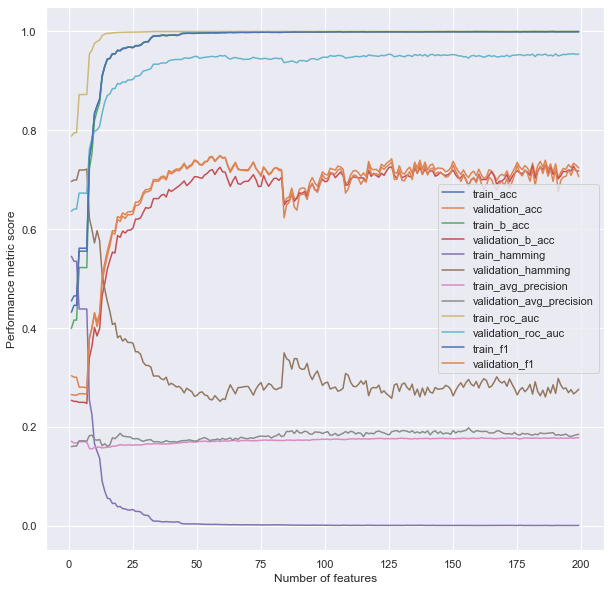

Result saved as: GBFS_convergence_plot_crystal_structure.png


<Figure size 720x720 with 0 Axes>

In [9]:
# Plot the result
FS.convergence_plot()

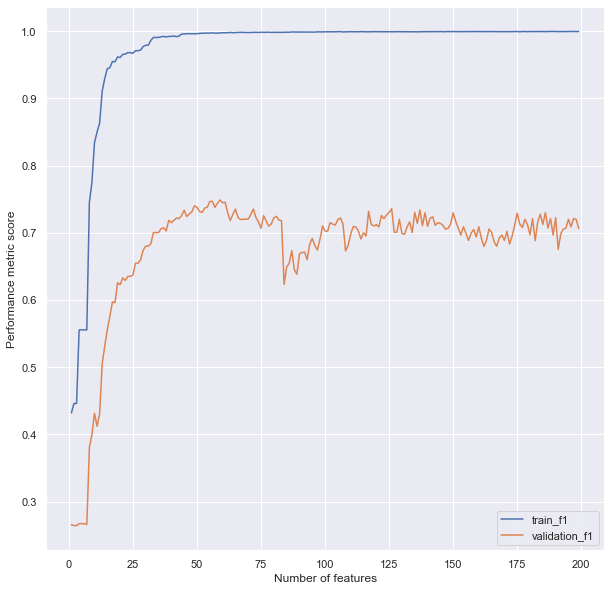

Result saved as: GBFS_convergence_plot_crystal_structure.png


<Figure size 720x720 with 0 Axes>

In [10]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_f1',
                    validation_metric = 'validation_f1'
                    )

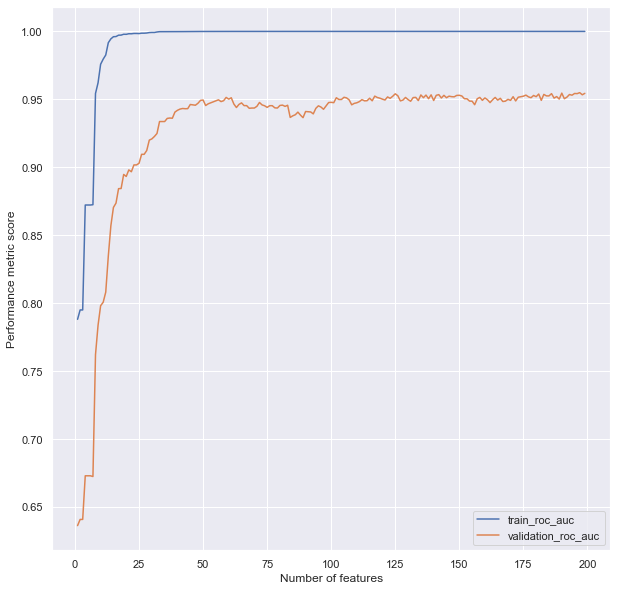

Result saved as: GBFS_convergence_plot_crystal_structure.png


<Figure size 720x720 with 0 Axes>

In [11]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_roc_auc',
                    validation_metric = 'validation_roc_auc'
                    )

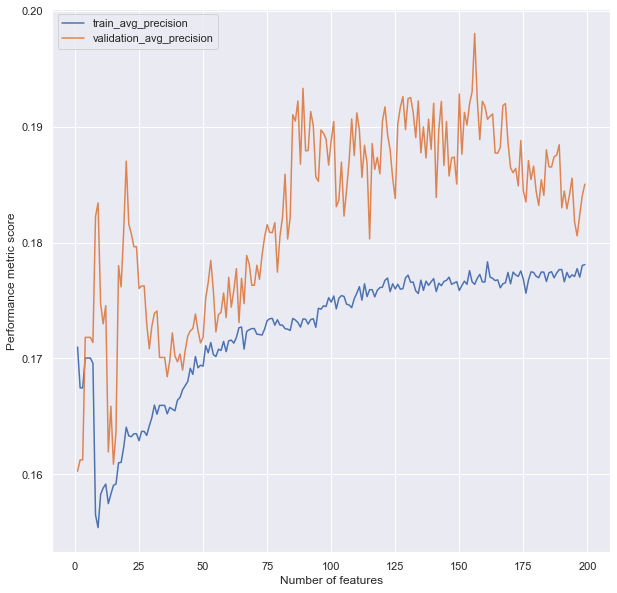

Result saved as: GBFS_convergence_plot_crystal_structure.png


<Figure size 720x720 with 0 Axes>

In [12]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_avg_precision',
                    validation_metric = 'validation_avg_precision'
                    )

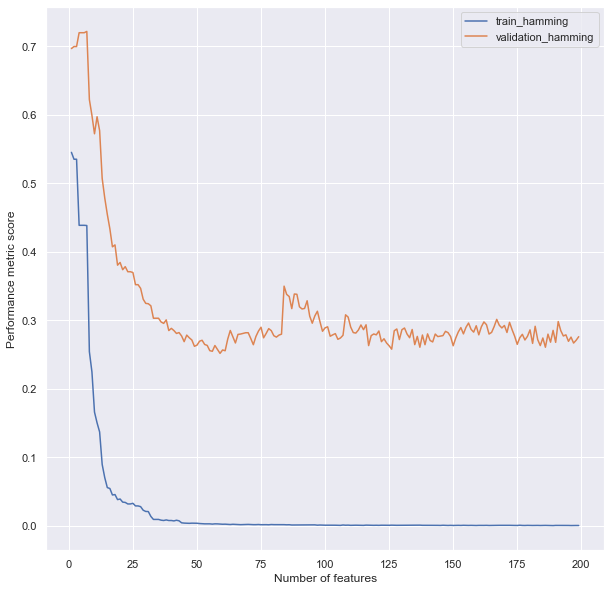

Result saved as: GBFS_convergence_plot_crystal_structure.png


<Figure size 720x720 with 0 Axes>

In [13]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_hamming',
                    validation_metric = 'validation_hamming'
                    )

##### Statistical Analyses - Classification

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [2]:
# Target
target = 'crystal_structure'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/crystal_structure/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_crystal_structure.pkl'

problem = 'classification'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  crystal_structure
No. of exploratory features:  1826


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  97
No. of exploratory features:  1729


,formation_energy_per_atom,band_gap,diel.poly_electronic,piezo.eij_max,energy_per_atom,elasticity.K_Voigt_Reuss_Hill,elasticity.G_Voigt_Reuss_Hill,elasticity.poisson_ratio,nsites,volume,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,crystal_structure
task_id,,,,,,,,,,,,,,,,,,,,,
mp-1215326,0.679757,0.000000,0.890359,0.0,0.482189,0.0,0.292273,0.648584,0.034483,0.013389,...,0.083333,0.083333,0.106481,0.064815,0.090278,0.166667,0.115079,0.291667,0.037037,3
mp-1224191,0.698335,0.000000,0.890359,0.0,0.235989,0.0,0.292273,0.648584,0.009404,0.002675,...,0.000000,0.464286,0.125000,0.062500,0.296875,0.041667,0.214286,0.083333,0.041667,5
mp-762244,0.596307,0.062802,0.890359,0.0,0.711482,0.0,0.292273,0.648584,0.084639,0.028442,...,0.031746,0.040816,0.174603,0.023810,0.035714,0.071429,0.149660,0.126984,0.150794,4
mp-769590,0.591745,0.114204,0.890359,0.0,0.486296,0.0,0.292273,0.648584,0.084639,0.019868,...,0.155754,0.104592,0.094246,0.144841,0.117560,0.203373,0.167517,0.153770,0.072421,1
mp-1232145,0.662566,0.000000,0.890359,0.0,0.688506,0.0,0.292273,0.648584,0.028213,0.018865,...,0.066667,0.009524,0.058333,0.044444,0.025000,0.072222,0.026190,0.041667,0.005556,2


In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem=problem, 
                                all_features=True, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  0
No. of numerical features:  1729 

Considering all features. 

Result saved as:  ANOVA_F_test_result_crystal_structure_classification.pkl


,feature_names,f_statistic,f_statistic_scaled
0,O.1,3001.851227,1.000000
1,chalcogen,2640.465987,0.879592
2,avg_electroneg,2347.996894,0.782146
3,6,2202.675953,0.733728
4,O,2153.132254,0.717221
...,...,...,...
1724,diel.poly_electronic,0.644030,0.000047
1725,1465,0.586710,0.000028
1726,828,0.586339,0.000028
1727,827,0.513775,0.000004


In [6]:
### No categorical features on this example

# df_chi2 = analyses.chi2_test(csv=False)

# df_chi2

In [7]:
df_mi = analyses.mutual_information(
                                problem=problem, 
                                csv=False
                                )

df_mi 

There are:
No. of categorical features:  0
No. of numerical features:  1729 

Result saved as: MI_result_crystal_structure.pkl


,feature_names,MI,MI_scaled
0,1009,0.566007,1.000000
1,979,0.500903,0.884976
2,1039,0.486692,0.859869
3,1098,0.483446,0.854134
4,1188,0.457802,0.808828
...,...,...,...
1715,Ar.1,0.000000,0.000000
1714,Ar,0.000000,0.000000
1713,Ac.1,0.000000,0.000000
1712,827,0.000000,0.000000


In [9]:
df_ld = analyses.logistic_discrimination(
                                        target_classes=7, 
                                        class_names=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic'], 
                                        csv=False
                                        )

df_ld

Result saved as: logistic_discrimination_result_crystal_structure.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,feature_names,Triclinic,Monoclinic,Orthorhombic,Tetragonal,Trigonal,Hexagonal,Cubic
0,formation_energy_per_atom,0.178081,-0.432468,0.667236,-0.485786,-2.742635,0.298072,2.517500
1,band_gap,0.759647,0.456862,0.091866,0.158155,0.648122,-1.099165,-1.015488
2,diel.poly_electronic,0.032579,-0.006392,0.007692,0.018387,0.043442,0.047096,-0.142804
3,diel.refractive_index,-0.036897,-0.047119,0.099157,-0.002386,0.134178,0.051993,-0.198927
4,piezo.eij_max,1.052490,0.482746,-2.047844,-0.155581,-3.564327,1.278661,2.953855
...,...,...,...,...,...,...,...,...
1724,1455,0.220331,0.417292,0.123044,-0.630395,0.152340,-0.048780,-0.233832
1725,1456,0.093931,0.686114,0.111193,-0.521207,-0.052113,-0.194422,-0.123496
1726,1457,-0.034614,-0.130326,-0.119923,-0.079437,0.201631,-0.095272,0.257941
1727,1458,0.232269,0.065005,0.763635,-0.084077,-0.730985,-0.326653,0.080806


#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'crystal_structure'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/crystal_structure/'
path_to_save = path + target + '_results/'
path_to_file = path + 'df_crystal_structure.pkl'  # all data

# Either a list or saved file
features = path + 'features_crystal_structure.pkl'

problem = 'classification'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_' + problem + '.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,O.1,3001.851227,1.000000
1,chalcogen,2640.465987,0.879592
2,avg_electroneg,2347.996894,0.782146
3,6,2202.675953,0.733728
4,O,2153.132254,0.717221


In [4]:
# # Top n features from chi2 
# df_chi2 = joblib.load(path_to_save + 'chi_squared_test_result_' + target + '.pkl')

# # Top n features
# n = 5
# chi2_features = df_chi2['feature_names'].tolist()[:n]

# df_chi2.iloc[:n, :]

In [5]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 2
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,1009,0.566007,1.000000
1,979,0.500903,0.884976


In [6]:
# Top n features from LR 
df_ld = joblib.load(path_to_save + 'logistic_discrimination_result_' + target + '.pkl')

# Top and bottom n features
n = 1

df_ld = df_ld.sort_values('Triclinic', ascending=False)
a = df_ld['feature_names'].tolist()[:n]

df_ld = df_ld.sort_values('Monoclinic', ascending=False)
b = df_ld['feature_names'].tolist()[:n]

df_ld = df_ld.sort_values('Orthorhombic', ascending=False)
c = df_ld['feature_names'].tolist()[:n]

df_ld = df_ld.sort_values('Tetragonal', ascending=False)
d = df_ld['feature_names'].tolist()[:n]

df_ld = df_ld.sort_values('Trigonal', ascending=False)
e = df_ld['feature_names'].tolist()[:n]

df_ld = df_ld.sort_values('Hexagonal', ascending=False)
f = df_ld['feature_names'].tolist()[:n]

df_ld = df_ld.sort_values('Cubic', ascending=False)
g = df_ld['feature_names'].tolist()[:n]

ld_features = a + b + c + d + e + f + g

In [7]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,nsites,34971.343419
1,830,24549.714128
2,155,23884.096268
3,1397,15055.352832
4,noble_gas,14679.713981


In [8]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  crystal_structure
No. of exploratory features:  1826


In [9]:
# Join the features
feature_list = anova_features + mi_features + ld_features + gbfs_features

print(len(feature_list))

19


In [10]:
# Perform feature engineering
df, new_cols = perform.brute_force(
                    feature_list = feature_list
                    )

df.head()

Total number of permutation: 342
Invalid operations: 0


,formation_energy_per_atom,band_gap,diel.poly_electronic,diel.refractive_index,piezo.eij_max,energy_per_atom,elasticity.K_Voigt_Reuss_Hill,elasticity.G_Voigt_Reuss_Hill,elasticity.poisson_ratio,nsites,...,noble_gas/elasticity.poisson_ratio,noble_gas/Pu,noble_gas/volume,noble_gas/energy_per_atom,noble_gas/1307,noble_gas/nsites,noble_gas/830,noble_gas/155,noble_gas/1397,crystal_structure
task_id,,,,,,,,,,,,,,,,,,,,,
mvc-7733,-2.014294,0.8402,0.0,0.0,0.0,-6.667034,0.0,0.0,0.00,88.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,2
mp-981365,-0.298756,0.0000,0.0,0.0,0.0,-10.269663,250.0,124.0,0.29,4.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,7
mp-1216333,-1.621763,2.6615,0.0,0.0,0.0,-5.996506,0.0,0.0,0.00,26.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,2
mp-674329,-1.162344,0.5282,0.0,0.0,0.0,-4.498261,0.0,0.0,0.00,14.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,4
mp-555534,-2.218500,3.0885,0.0,0.0,0.0,-6.587916,0.0,0.0,0.00,48.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,5


In [11]:
perform.save()

Result saved as: df_crystal_structure_engineered_features.pkl
Result saved as: features_crystal_structure_engineered.pkl
Result saved as: df_train_crystal_structure_engineered.pkl
Result saved as: df_test_crystal_structure_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'crystal_structure'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/crystal_structure/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 75 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'classification'

print('No. of columns from GBFS:', len(gbfs_cols))
print('No. of new columns:',len(new_cols))

len(features)

No. of columns from GBFS: 75
No. of new columns: 342


417

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  crystal_structure
No. of exploratory features:  417


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.9)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  244
Features saved as: features_selected_from_correlation_analysis_crystal_structure.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_crystal_structure.png


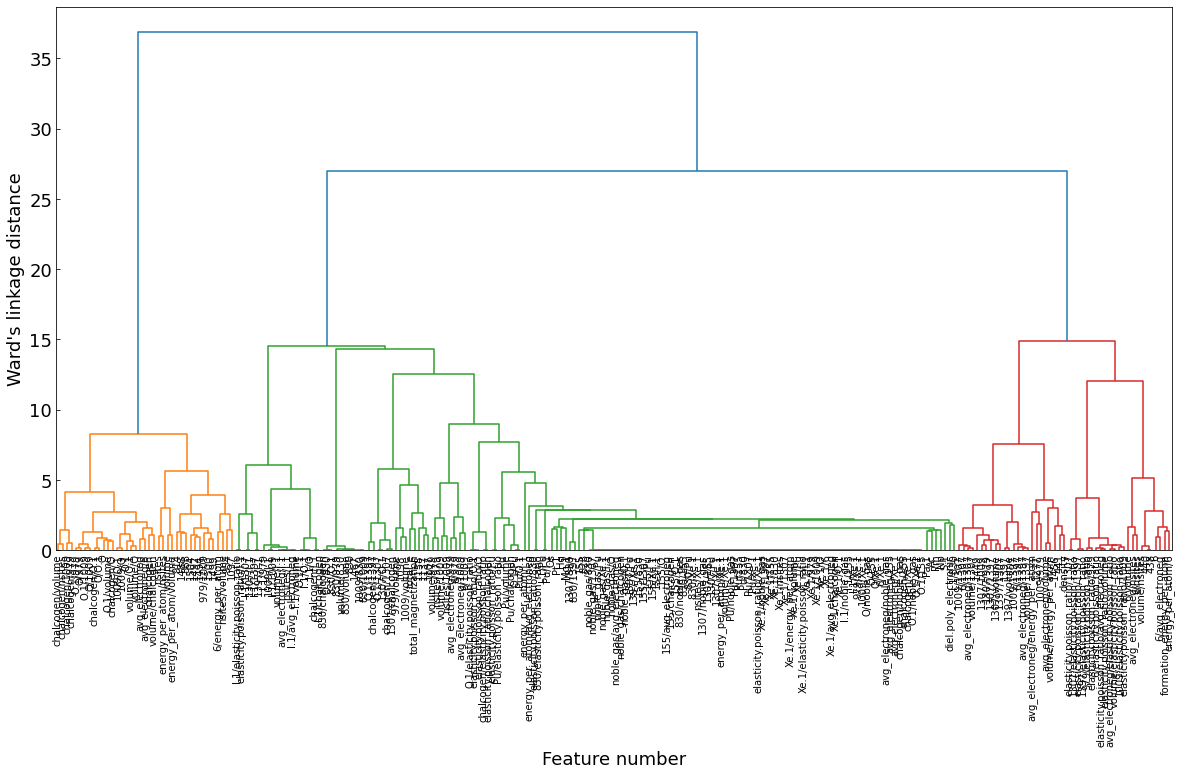

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  171
Features saved as features_selected_from_hierarchical_analysis_crystal_structure_threshold_0.pkl
Number of features remaining:  111
Features saved as features_selected_from_hierarchical_analysis_crystal_structure_threshold_0.5.pkl
Number of features remaining:  89
Features saved as features_selected_from_hierarchical_analysis_crystal_structure_threshold_1.pkl
Number of features remaining:  63
Features saved as features_selected_from_hierarchical_analysis_crystal_structure_threshold_1.5.pkl
Number of features remaining:  45
Features saved as features_selected_from_hierarchical_analysis_crystal_structure_threshold_2.pkl
Number of features remaining:  38
Features saved as features_selected_from_hierarchical_analysis_crystal_structure_threshold_2.5.pkl
Number of features remaining:  27
Features saved as features_selected_from_hierarchical_analysis_crystal_structure_threshold_3.pkl
Number of features remaining:  25
Features saved as features_selected_from_

#### Test Dummy Model

In [7]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [8]:
# Target
target = 'crystal_structure'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/crystal_structure/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'classification'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_0.5.pkl')
len(features)

111

In [9]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='multiclass',
                        random_state=42,
                        learning_rate=0.1,
                        n_estimators=400,
                        num_leaves=40,
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', n_estimators=400, num_leaves=40,
               objective='multiclass', random_state=42)

In [10]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

name = ['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=name,
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))

1. The F-1 score of the model 0.8342301170581773

2. The recall score of the model 0.8329250867523984

3. Classification report 
               precision    recall  f1-score   support

   Triclinic      0.823     0.751     0.785      1095
  Monoclinic      0.689     0.753     0.720      1813
Orthorhombic      0.765     0.839     0.800      2095
  Tetragonal      0.860     0.796     0.827      1064
    Trigonal      0.877     0.740     0.803       781
   Hexagonal      0.941     0.902     0.921       879
       Cubic      0.983     0.965     0.974      2071

    accuracy                          0.833      9798
   macro avg      0.848     0.821     0.833      9798
weighted avg      0.838     0.833     0.834      9798
 

4. Classification report 
 [[[8526  177]
  [ 273  822]]

 [[7368  617]
  [ 447 1366]]

 [[7164  539]
  [ 338 1757]]

 [[8596  138]
  [ 217  847]]

 [[8936   81]
  [ 203  578]]

 [[8869   50]
  [  86  793]]

 [[7692   35]
  [  73 1998]]] 

5. Confusion matrix 
 [[ 822  24

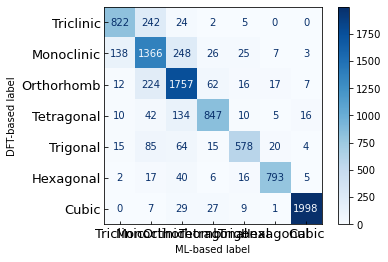

In [11]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

name = ['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(name, dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )


plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
# plt.savefig('confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

#### Recursive Feature Elimination

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [2]:
# Target
target = 'crystal_structure'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/crystal_structure/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_0.5.pkl')
print(len(features))

scaled = False

problem = 'classification'

111


In [3]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: crystal_structure
No. of features: 111


In [4]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM', objective='multiclass')
RFE_features = run.perform(cv_fold=10)

Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimato

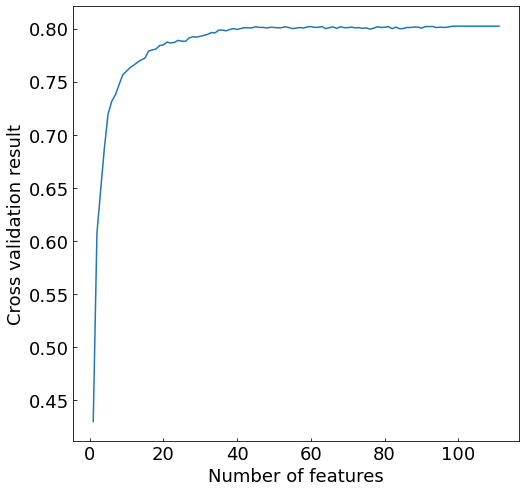

Figure saved as: RFE_plot_crystal_structure.png


In [5]:
# Plot figure
run.RFE_plot()

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'crystal_structure'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/crystal_structure/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  crystal_structure
No. of exploratory features:  99


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM', objective='multiclass')

LGBMClassifier(importance_type='gain', objective='multiclass', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian', n_calls=100)

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.03298989446752358, 'n_estimators': 392, 'num_leaves': 27} 

Score:  -0.8035587419480319 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 34.6255
Function value obtained: -0.8036
Current minimum: -0.8036
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.0739832994940839, 'n_estimators': 599, 'num_leaves': 33} 

Score:  -0.8259917370840133 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 46.1830
Function value obtained: -0.8260
Current minimum: -0.8260
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.06607653738811504, 'n_estimators': 536, 'num_leaves': 59} 

Score:  -0.831273177148178 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 63.5538
Function value obtained: -0.8313
Current minimum: -0.8313
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rat

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Score:  -0.8363923993107895 

Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 89.4355
Function value obtained: -0.8364
Current minimum: -0.8373
Iteration No: 48 started. Searching for the next optimal point.

 {'learning_rate': 0.1439455511347756, 'n_estimators': 512, 'num_leaves': 35} 

Score:  -0.8286658911163046 

Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 40.9262
Function value obtained: -0.8287
Current minimum: -0.8373
Iteration No: 49 started. Searching for the next optimal point.

 {'learning_rate': 0.11886230941531208, 'n_estimators': 603, 'num_leaves': 53} 

Score:  -0.8330526060113831 

Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 67.6145
Function value obtained: -0.8331
Current minimum: -0.8373
Iteration No: 50 started. Searching for the next optimal point.

 {'learning_rate': 0.24523747310589897, 'n_estimators': 132, 'num_leaves': 10} 

Score:  -0.7849666748383359 

Itera

Saved: Optimisation_result_crystal_structure.png


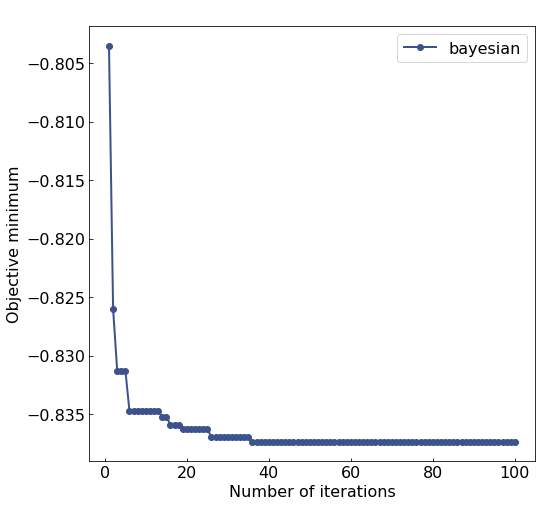

In [17]:
# Plot convergence plot
final_stage.convergence_plot()

<Figure size 720x720 with 0 Axes>

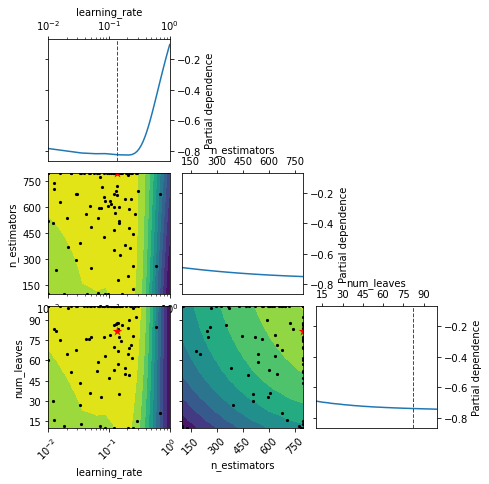

<Figure size 720x720 with 0 Axes>

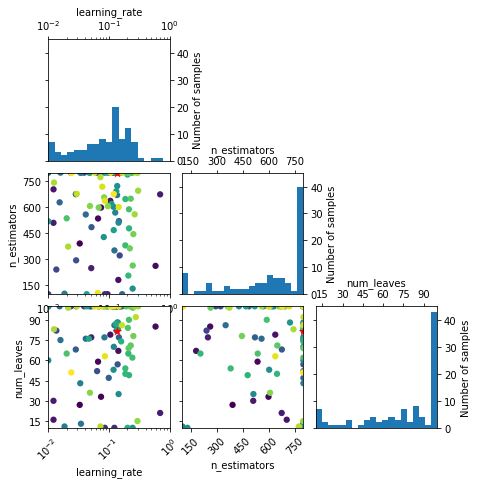

In [18]:
# objective and evaluation plot
final_stage.objective_plot()

<Figure size 720x720 with 0 Axes>

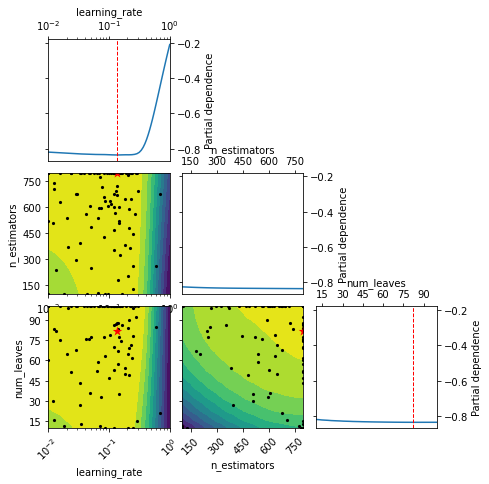

In [19]:
# objective and evaluation plot # expected_minimum_random, expected_minimum
final_stage.objective_plot_adjust(sample_source='expected_minimum', minimum='expected_minimum', n_minimum_search=2)

In [20]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMClassifier(importance_type='gain', learning_rate=0.13338567525558484,
               n_estimators=800, num_leaves=82, objective='multiclass',
               random_state=42)

1. The F-1 score of the model 0.8438721005310829

2. The recall score of the model 0.8431312512757706

3. Classification report 
               precision    recall  f1-score   support

   Triclinic       0.82      0.76      0.79      1095
  Monoclinic       0.71      0.76      0.74      1813
Orthorhombic       0.79      0.84      0.82      2095
  Tetragonal       0.87      0.81      0.84      1064
    Trigonal       0.88      0.77      0.82       781
   Hexagonal       0.93      0.91      0.92       879
       Cubic       0.97      0.97      0.97      2071

    accuracy                           0.84      9798
   macro avg       0.85      0.83      0.84      9798
weighted avg       0.85      0.84      0.84      9798
 

4. Classification report 
 [[[8521  182]
  [ 268  827]]

 [[7415  570]
  [ 427 1386]]

 [[7237  466]
  [ 325 1770]]

 [[8606  128]
  [ 197  867]]

 [[8938   79]
  [ 180  601]]

 [[8860   59]
  [  80  799]]

 [[7674   53]
  [  60 2011]]] 

5. Confusion matrix 
 [[ 827  23

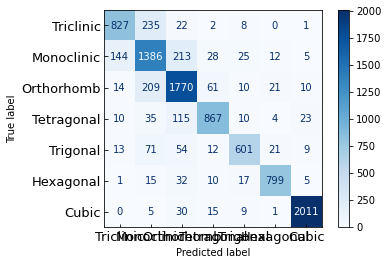

Saved: Confusion_matrix_crystal_structure.png


In [21]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy='weighted', 
                    target_names=['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']
                    )


Average ROC AUC score, micro-averaged over all classes: 0.983
Average ROC AUC score, macro-averaged over all classes: 0.979
Average ROC AUC score, weighted-averaged over all classes: 0.978


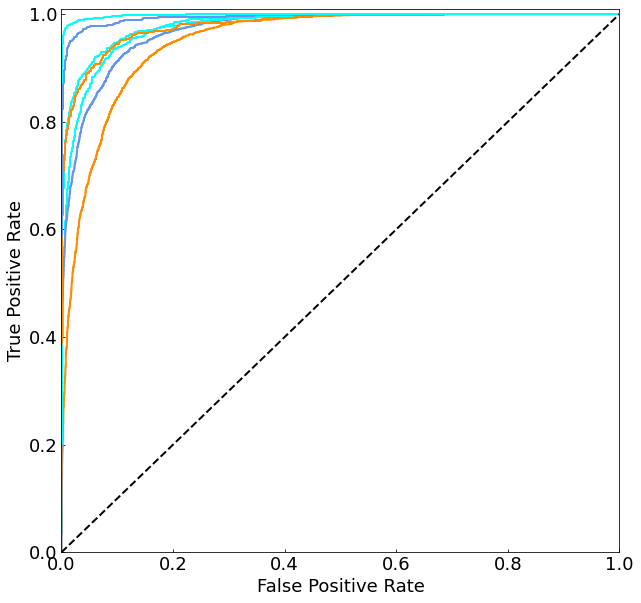

Saved: Receiver_operating_characteristic_curve_crystal_structure.png


In [22]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=False,
                #strategy='macro',
                )

Average ROC AUC score, micro-averaged over all classes: 0.983
Average ROC AUC score, macro-averaged over all classes: 0.979
Average ROC AUC score, weighted-averaged over all classes: 0.978


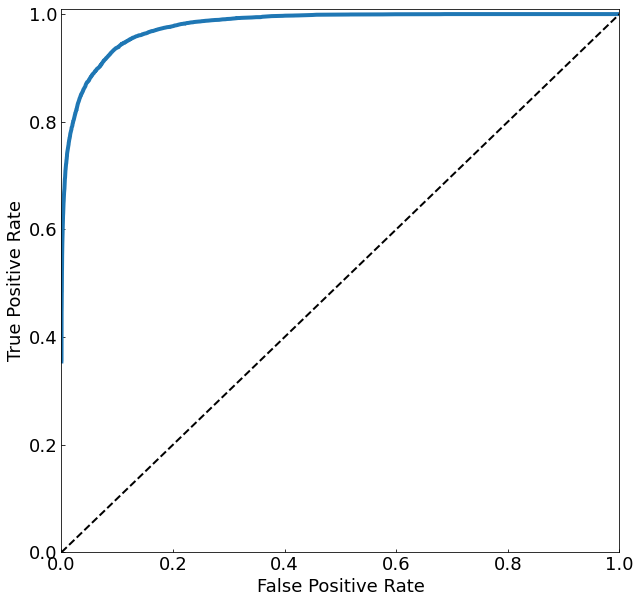

Saved: Receiver_operating_characteristic_curve_crystal_structure.png


In [23]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                strategy='macro',
                )

Average ROC AUC score, micro-averaged over all classes: 0.983
Average ROC AUC score, macro-averaged over all classes: 0.979
Average ROC AUC score, weighted-averaged over all classes: 0.978


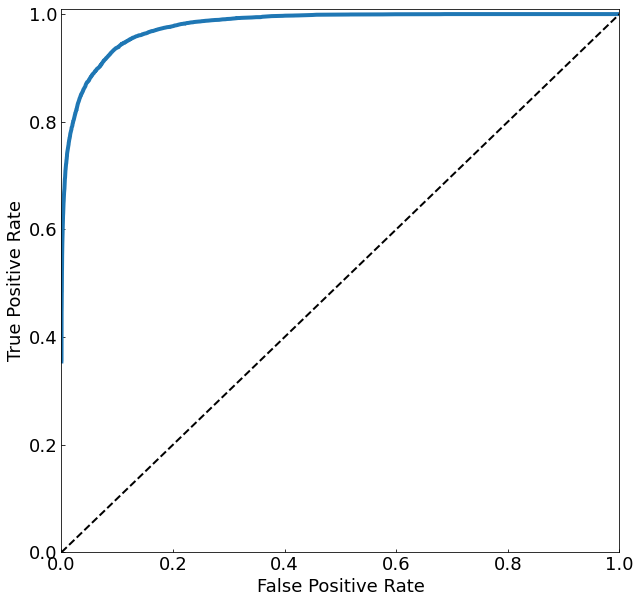

Saved: Receiver_operating_characteristic_curve_crystal_structure.png


In [24]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                strategy='macro'
                )

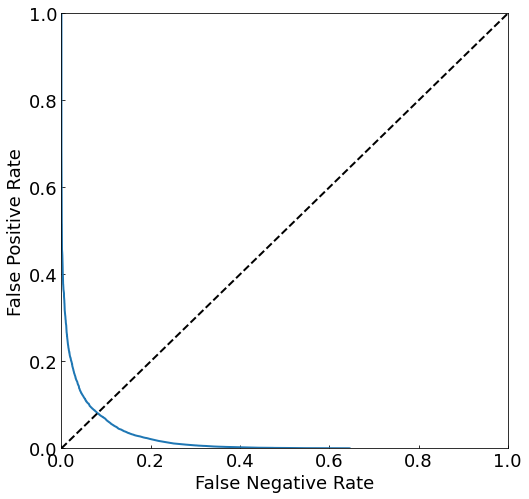

Saved: detection_error_tradeoff_curves_crystal_structure.png


In [25]:
# Evaluate model using test set
final_stage.DET(strategy='macro')

Average precision score, micro-averaged over all classes: 0.931
Average precision score, macro-averaged over all classes: 0.913
Average precision score, weighted-averaged over all classes: 0.914


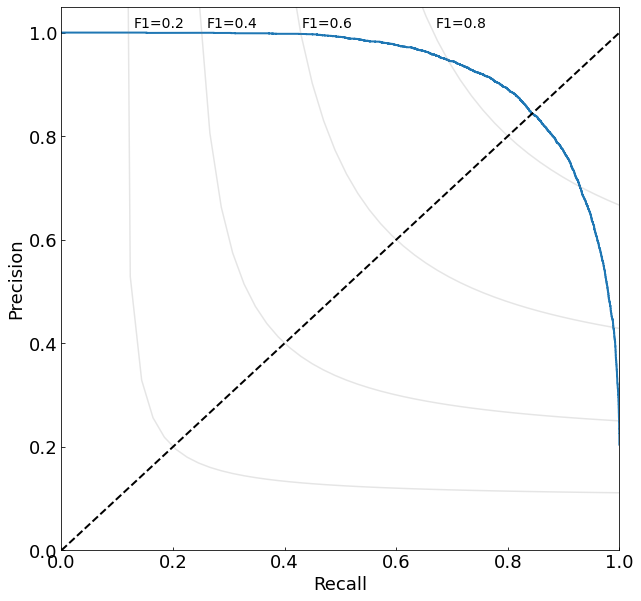

Saved: precision_recall_crystal_structure.png


In [26]:
# Evaluate model using test set
final_stage.PR()

### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'crystal_structure'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/8 other_properties/crystal_structure/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)
len(features)

99

In [4]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        learning_rate=0.13338567525558484,
                        n_estimators=800,
                        num_leaves=82,
                        random_state=42
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', learning_rate=0.13338567525558484,
               n_estimators=800, num_leaves=82, objective='binary',
               random_state=42)

In [5]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

# y_train = label_binarize(y_train_0, classes=[1, 2, 3, 4, 5, 6, 7]) 
# y_train = label_binarize(y_train_0, classes=[0, 1, 2, 3, 4, 5, 6]) 

name = ['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=name,
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))


1. The F-1 score of the model 0.8451082696086938

2. The recall score of the model 0.8443559910185752

3. Classification report 
               precision    recall  f1-score   support

   Triclinic      0.832     0.762     0.795      1095
  Monoclinic      0.712     0.769     0.740      1813
Orthorhombic      0.789     0.843     0.815      2095
  Tetragonal      0.869     0.816     0.841      1064
    Trigonal      0.883     0.766     0.820       781
   Hexagonal      0.932     0.915     0.923       879
       Cubic      0.974     0.969     0.972      2071

    accuracy                          0.844      9798
   macro avg      0.856     0.834     0.844      9798
weighted avg      0.848     0.844     0.845      9798
 

4. Classification report 
 [[[8535  168]
  [ 261  834]]

 [[7422  563]
  [ 418 1395]]

 [[7231  472]
  [ 328 1767]]

 [[8603  131]
  [ 196  868]]

 [[8938   79]
  [ 183  598]]

 [[8860   59]
  [  75  804]]

 [[7674   53]
  [  64 2007]]] 

5. Confusion matrix 
 [[ 834  22

In [6]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, average_precision_score
# import numpy as np
# np.seterr(divide='ignore', invalid='ignore')

print(roc_auc_score(np.array(y_test.tolist()), y_pred, average='macro', multi_class='ovr'))
print(matthews_corrcoef(np.array(y_test.tolist()), y_pred_2))

n_classes = 7
y_test_2 = label_binarize(y_test, classes = list(range(n_classes)))
print(average_precision_score(y_test_2, y_pred, average="macro"))


0.9787607637976095
0.8136748430792804
0.9125306803343912


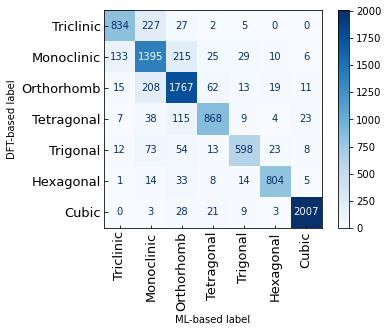

In [7]:

# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(name, dtype='<U10'),
                            xticks_rotation='vertical',
                            cmap=plt.cm.Blues,
                            normalize=None
                            )


# disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
plt.savefig(path_to_save + 'confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()



In [8]:
df_test.groupby([target]).count()

,formation_energy_per_atom,band_gap,diel.poly_electronic,diel.refractive_index,piezo.eij_max,energy_per_atom,elasticity.K_Voigt_Reuss_Hill,elasticity.G_Voigt_Reuss_Hill,elasticity.poisson_ratio,nsites,...,noble_gas/Xe.1,noble_gas/elasticity.poisson_ratio,noble_gas/Pu,noble_gas/volume,noble_gas/energy_per_atom,noble_gas/1307,noble_gas/nsites,noble_gas/830,noble_gas/155,noble_gas/1397
crystal_structure,,,,,,,,,,,,,,,,,,,,,
0,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,...,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095
1,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,...,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813
2,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095,...,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095
3,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,...,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064
4,781,781,781,781,781,781,781,781,781,781,...,781,781,781,781,781,781,781,781,781,781
5,879,879,879,879,879,879,879,879,879,879,...,879,879,879,879,879,879,879,879,879,879
6,2071,2071,2071,2071,2071,2071,2071,2071,2071,2071,...,2071,2071,2071,2071,2071,2071,2071,2071,2071,2071


[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

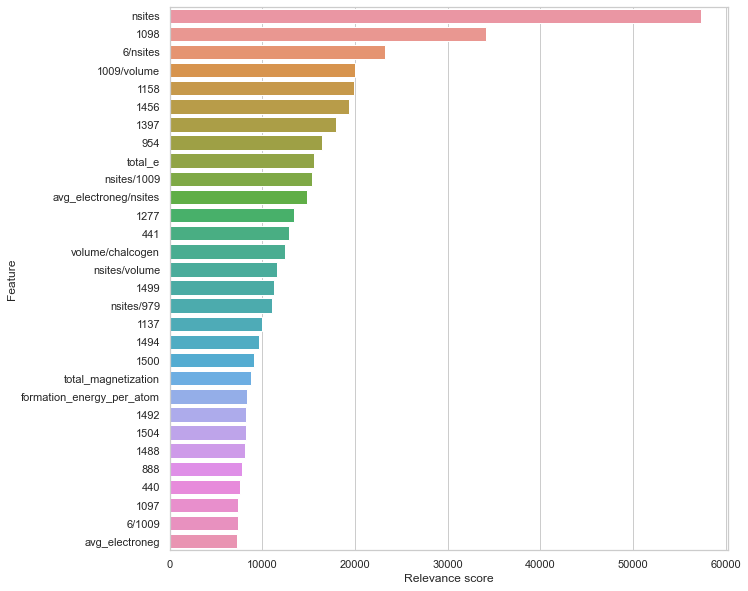

In [9]:
import seaborn as sns
# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)